# How to use Maskix

## What you'll learn
- theory
- how to initialize and run maskix
  - Maskix sepcific hyperparameters
- how to visualize and obtain results
- How to pass a custom maksing function
- How to use Masking to impute data
- How to save, load and re-use Maskix
## Theory
adsjf;dsljf


### Run the next cell first, to be in the correct direcotry

In [1]:
import os

p = os.getcwd()
d = "autoencodix_package"
if d not in p:
    raise FileNotFoundError(f"'{d}' not found in path: {p}")
os.chdir(os.sep.join(p.split(os.sep)[: p.split(os.sep).index(d) + 1]))
print(f"Changed to: {os.getcwd()}")

Changed to: /Users/maximilianjoas/development/autoencodix_package


### Test Data With Varix

In [2]:
import autoencodix as acx
from autoencodix.configs import VarixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase

sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
config = VarixConfig(
    epochs=50,
    checkpoint_interval=10,
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
varix = acx.Varix(config=config)

In [3]:
result = varix.run()

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc
Epoch 1 - Train Loss: 18066.4755
Sub-losses: recon_loss: 18054.4883, var_loss: 11.9873, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 20464.2643
Sub-losses: recon_loss: 20458.2156, var_loss: 6.0486, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 17323.8472
Sub-losses: recon_loss: 17308.3645, var_loss: 15.4828, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 20430.8720
Sub-losses: recon_loss: 20368.8352, var_loss:

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:34: UserWarning: Model weights plot is skipped since input dimension 17246 is larger than 3000 and heatmap would be too large.
  warnings.warn(


Creating plots ...


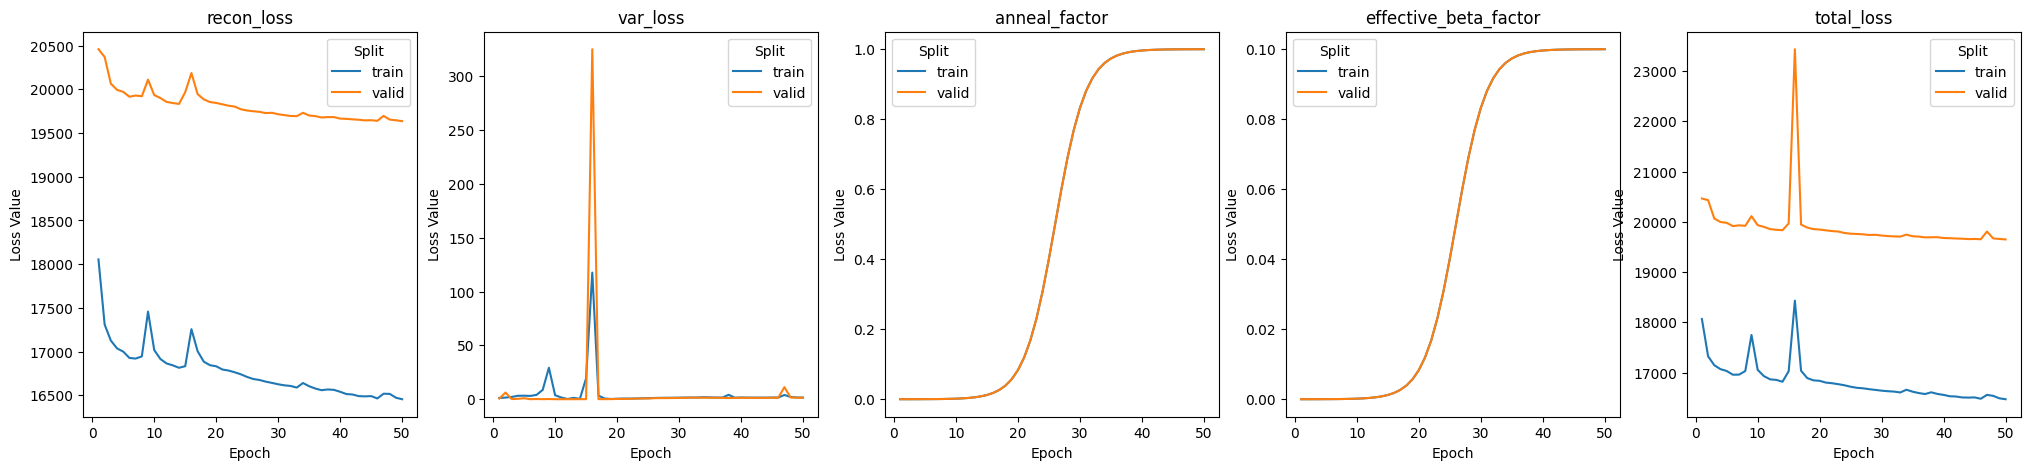

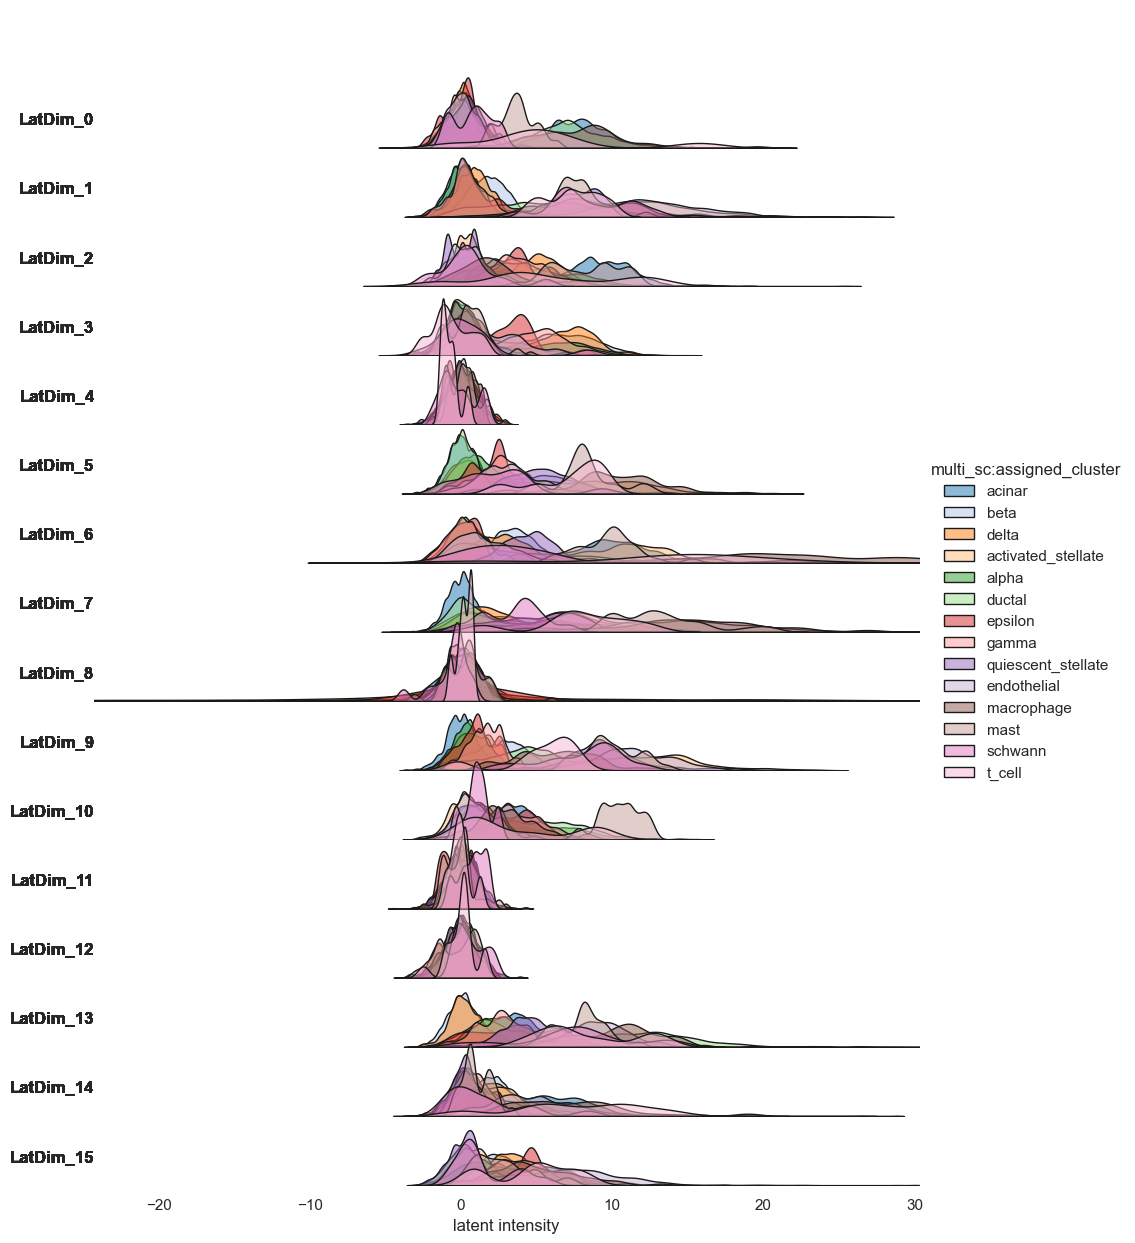

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


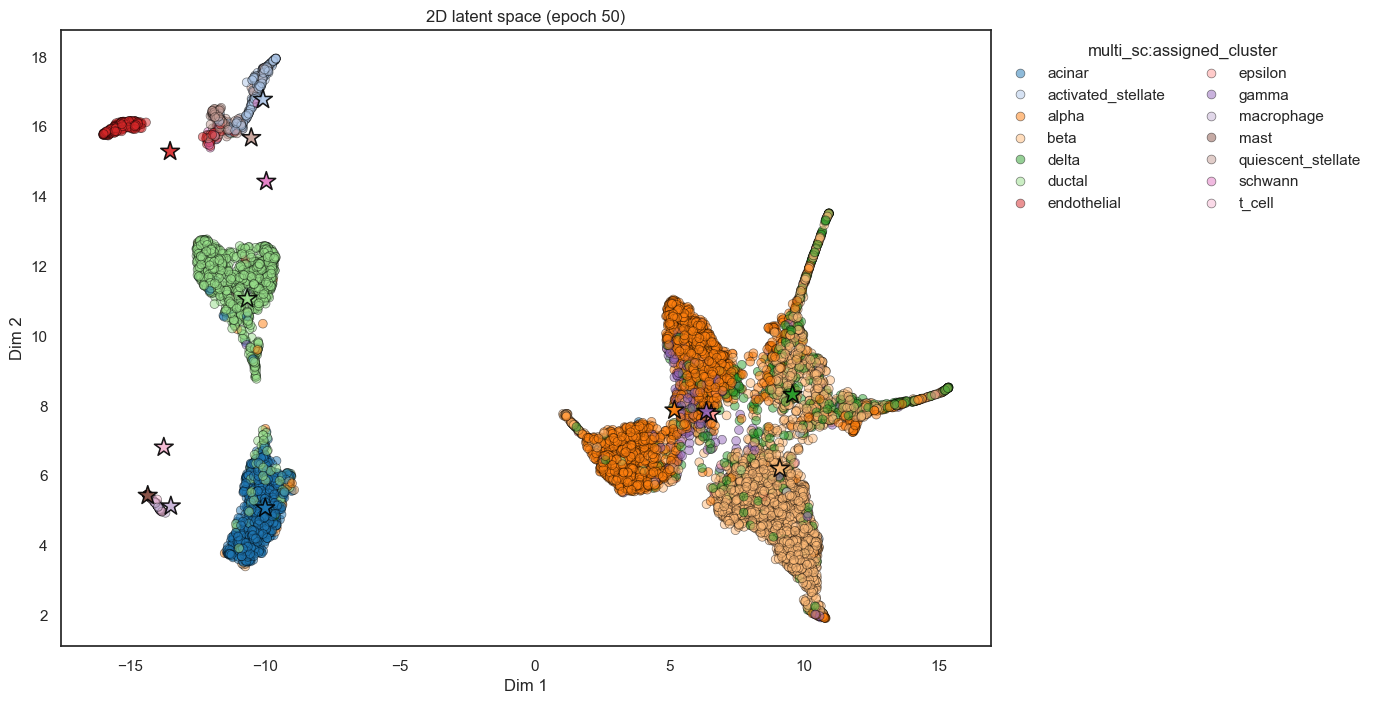

In [4]:
varix.show_result()

#### Potential Bug in Paper
The authors write their shuffle the samples independent per gene, but the code suggests dependent shuffling, see below.

In [5]:
for _, batch, _ in varix._trainer._trainloader:
    print(batch)
    break

tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ...,  1.3917, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        ...,
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322,  4.0599, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ...,  3.6745,  2.0194, -0.2890]],
       device='mps:0')


In [6]:
import torch


def apply_noise(X, p=[0.2, 0.4]):
    p = torch.tensor(p)
    should_swap = torch.bernoulli(p.to(X.device) * torch.ones((X.shape)).to(X.device))
    permut = torch.randperm(X.shape[0])
    print(permut)
    corrupted_X = torch.where(should_swap == 1, X[permut], X)
    print(corrupted_X)
    masked = (corrupted_X != X).float()
    return corrupted_X, masked


In [7]:
batch.shape

torch.Size([64, 17246])

In [8]:
batch

tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ...,  1.3917, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        ...,
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322,  4.0599, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ...,  3.6745,  2.0194, -0.2890]],
       device='mps:0')

In [9]:
apply_noise(batch, p=0.4)

tensor([48, 23, 50, 49, 22, 38, 55, 37, 32, 31, 56, 16, 14,  3, 10, 27,  9, 39,
         8, 51, 41, 46,  0, 25, 17, 24, 59,  1, 29, 60, 47, 44, 18, 33, 62, 54,
        57, 45, 58, 21, 13, 36, 52, 28, 26, 35, 20, 11, 40,  5, 12, 53, 42, 34,
         6, 30, 15, 63, 43,  2, 61,  4,  7, 19])
tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        ...,
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322,  4.0599, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ...,  3.6745,  2.0194, -0.2890]],
       device='mps:0')


(tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
         [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
         [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
         ...,
         [-0.0583, -0.3499, -0.1368,  ..., -0.3322,  4.0599, -0.2890],
         [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
         [-0.0583, -0.3499, -0.1368,  ...,  3.6745,  2.0194, -0.2890]],
        device='mps:0'),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='mps:0'))

#### Correction


In [10]:
from typing import List

X = batch
print(f"batch shape: {X.shape}")
mask_probas_list: List[float] = [
    varix.config.maskix_swap_prob
] * varix._trainer._model.input_dim
mask_probas = torch.tensor(mask_probas_list).to(varix._trainer._model.device)
print(f"mask_probas shape: {mask_probas.shape}")


probs = mask_probas.expand(X.shape)
print(f"probs shape after expand: {probs.shape}")

should_swap = torch.bernoulli(probs).bool()

rand_indices = torch.rand(X.shape, device=X.device).argsort(dim=0)
print(f"rand_indices : {rand_indices}")

shuffled_X = torch.gather(X, 0, rand_indices)
print(f"shuffled_X: {shuffled_X}")
corrupted_X = torch.where(should_swap, shuffled_X, X)
print(f"corrupted_X: {corrupted_X}")


batch shape: torch.Size([64, 17246])
mask_probas shape: torch.Size([17246])
probs shape after expand: torch.Size([64, 17246])
rand_indices : tensor([[51,  6, 49,  ..., 62, 52,  6],
        [ 5, 16, 13,  ..., 42, 46, 58],
        [50, 60, 32,  ..., 25, 25, 32],
        ...,
        [24,  9, 62,  ..., 24, 11, 17],
        [22, 24,  8,  ..., 49, 54, 45],
        [43, 13, 24,  ..., 12,  2,  1]], device='mps:0')
shuffled_X: tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499,  6.3351,  ...,  3.7024, -0.2634,  1.9242],
        ...,
        [-0.0583,  1.1056, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890]],
       device='mps:0')
corrupted_X: tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  

In [11]:
import torch

rand_indices = torch.rand(X.shape, device=X.device).argsort(dim=0)
print(f"rand_indices : {rand_indices}")


rand_indices : tensor([[53, 58, 39,  ..., 40, 10,  5],
        [21, 62, 35,  ..., 33,  4, 60],
        [ 8,  7,  8,  ...,  2, 20, 42],
        ...,
        [62, 27,  2,  ..., 60, 26, 10],
        [56, 14, 29,  ..., 29, 30, 45],
        [50, 59,  4,  ..., 38, 47, 51]], device='mps:0')


In [12]:
rand_indices.shape

torch.Size([64, 17246])

In [13]:
shuffled_X = torch.gather(X, 0, rand_indices)

In [14]:
print(f"shuffled_X: {shuffled_X}")

shuffled_X: tensor([[-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        ...,
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583, -0.3499, -0.1368,  ..., -0.3322, -0.2634, -0.2890],
        [-0.0583,  1.1562, -0.1368,  ..., -0.3322, -0.2634, -0.2890]],
       device='mps:0')


In [15]:
torch.rand(X.shape, device=X.device)

tensor([[0.1274, 0.5476, 0.6227,  ..., 0.8755, 0.0479, 0.9348],
        [0.0159, 0.9574, 0.9596,  ..., 0.2800, 0.6522, 0.3631],
        [0.7695, 0.4431, 0.2777,  ..., 0.2647, 0.4821, 0.9919],
        ...,
        [0.4004, 0.2741, 0.0150,  ..., 0.3815, 0.7661, 0.6114],
        [0.5130, 0.6114, 0.1797,  ..., 0.6292, 0.5444, 0.1822],
        [0.8481, 0.8051, 0.7930,  ..., 0.3696, 0.5405, 0.9487]],
       device='mps:0')

## Test Maskix Pipeline

In [6]:
import autoencodix as acx
from autoencodix.configs import MaskixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase

sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
config = MaskixConfig(
    epochs=30,
    checkpoint_interval=1,
    n_layers=3,
    k_filter=1000,
    maskix_architecture="custom",
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
maskix = acx.Maskix(config=config)

In [ ]:
maskix.config.n_layers = 0

In [7]:
maskix_result = maskix.run()

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 449.9855
Sub-losses: recon_loss: 331.1010, mask_loss: 500.9361
Epoch 1 - Valid Loss: 368.3691
Sub-losses: recon_loss: 334.5586, mask_loss: 382.8592
Epoch 2 - Train Loss: 358.7159
Sub-losses: recon_loss: 311.8748, mask_loss: 378.7906
Epoch 2 - Valid Loss: 359.8145
Sub-losses: recon_loss: 318.6402, mask_loss: 377.4606
Epoch 3 - Train Loss: 352.9654
Sub-losses: recon_loss: 297.8419, mask_loss: 376.5898
Epoch 3 - Valid Loss: 354.8550
Sub-losses: recon_loss: 304.6129, mask_loss: 376.3874
Epoch 4 - Train Loss: 350.3842
Sub-losses: recon_loss: 289.4713, mask_loss: 376.4897
Epoch 4 - Valid Loss: 354.3542
Sub-losses: recon_loss: 302.0455, mask_loss: 376.7722
Epoch 5 - Train Loss: 347.8860
Sub-losses: recon_loss: 281.6168, mask_loss: 376.2871
Epoch 5 - Valid Loss: 352.7503
Sub-losses: recon_loss: 296.4877, mask_loss: 376.8628
Epoch 6 - Train Loss: 346.2394
Sub-losses: recon_loss: 277.2605, mask_loss: 375.8018
Epoch 6 - Valid Loss: 352.5064
Sub-losses: recon_loss: 298.1510, 

In [8]:
maskix_result.model

MaskixArchitectureVanilla(
  (_mask_predictor): Linear(in_features=16, out_features=1000, bias=True)
  (_encoder): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LayerNorm((250,), eps=1e-05, elementwise_affine=True)
    (3): Mish(inplace=True)
    (4): Linear(in_features=250, out_features=62, bias=True)
    (5): LayerNorm((62,), eps=1e-05, elementwise_affine=True)
    (6): Mish(inplace=True)
    (7): Linear(in_features=62, out_features=16, bias=True)
    (8): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
    (9): Mish(inplace=True)
    (10): Linear(in_features=16, out_features=16, bias=True)
  )
  (_decoder): Sequential(
    (0): Linear(in_features=1016, out_features=1000, bias=True)
    (1): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
    (2): Mish(inplace=True)
    (3): Linear(in_features=1000, out_features=1000, bias=True)
    (4): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
    

In [9]:
maskix.fit()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 447.6918
Sub-losses: recon_loss: 324.7720, mask_loss: 500.3717
Epoch 1 - Valid Loss: 365.8317
Sub-losses: recon_loss: 322.2144, mask_loss: 384.5249
Epoch 2 - Train Loss: 355.7031
Sub-losses: recon_loss: 300.4836, mask_loss: 379.3687
Epoch 2 - Valid Loss: 356.9662
Sub-losses: recon_loss: 307.0759, mask_loss: 378.3477
Epoch 3 - Train Loss: 349.9157
Sub-losses: recon_loss: 286.9485, mask_loss: 376.9016
Epoch 3 - Valid Loss: 354.2510
Sub-losses: recon_loss: 301.7359, mask_loss: 376.7575
Epoch 4 - Train Loss: 348.0315
Sub-losses: recon_loss: 281.7434, mask_loss: 376.4408
Epoch 4 - Valid Loss: 354.6037
Sub-losses: recon_loss: 298.7584, mask_loss: 378.5374
Epoch 5 - Train Loss: 347.8321
Sub-losses: recon_loss: 280.3208, mask_loss: 376.7655
Epoch 5 - Valid Loss: 350.7877
Sub-losses: recon_loss: 288.3207, mask_loss: 377.5593
Epoch 6 - Train Loss: 345.6058
Sub-losses: recon_loss: 273.3764, mask_loss: 376.5612
Epoch 6 - Valid Loss: 351.4420
Sub-losses: recon_loss: 289.1349, 

In [10]:
maskix.result.model

MaskixArchitectureVanilla(
  (_mask_predictor): Linear(in_features=16, out_features=1000, bias=True)
  (_encoder): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LayerNorm((250,), eps=1e-05, elementwise_affine=True)
    (3): Mish(inplace=True)
    (4): Linear(in_features=250, out_features=62, bias=True)
    (5): LayerNorm((62,), eps=1e-05, elementwise_affine=True)
    (6): Mish(inplace=True)
    (7): Linear(in_features=62, out_features=16, bias=True)
    (8): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
    (9): Mish(inplace=True)
    (10): Linear(in_features=16, out_features=16, bias=True)
  )
  (_decoder): Sequential(
    (0): Linear(in_features=1016, out_features=1000, bias=True)
    (1): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
    (2): Mish(inplace=True)
    (3): Linear(in_features=1000, out_features=1000, bias=True)
    (4): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
    

In [12]:
maskix.config.n_layers = 0
maskix.fit()
maskix.result.model

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 570.6106
Sub-losses: recon_loss: 299.8505, mask_loss: 686.6507
Epoch 1 - Valid Loss: 555.0748
Sub-losses: recon_loss: 294.4447, mask_loss: 666.7734
Epoch 2 - Train Loss: 536.1203
Sub-losses: recon_loss: 273.9710, mask_loss: 648.4700
Epoch 2 - Valid Loss: 521.5735
Sub-losses: recon_loss: 284.2264, mask_loss: 623.2937
Epoch 3 - Train Loss: 501.6349
Sub-losses: recon_loss: 274.9626, mask_loss: 598.7802
Epoch 3 - Valid Loss: 475.0730
Sub-losses: recon_loss: 288.0001, mask_loss: 555.2472
Epoch 4 - Train Loss: 448.5145
Sub-losses: recon_loss: 281.2324, mask_loss: 520.2069
Epoch 4 - Valid Loss: 417.8983
Sub-losses: recon_loss: 304.3677, mask_loss: 466.5543
Epoch 5 - Train Loss: 397.0386
Sub-losses: recon_loss: 291.7350, mask_loss: 442.1687
Epoch 5 - Valid Loss: 382.0778
Sub-losses: recon_loss: 313.7980, mask_loss: 411.3405
Epoch 6 - Train Loss: 366.9881
Sub-losses: recon_loss: 290.5202, mask_loss: 399.7600
Epoch 6 - Valid Loss: 365.6127
Sub-losses: recon_loss: 312.7716, 

MaskixArchitectureVanilla(
  (_mask_predictor): Linear(in_features=16, out_features=1000, bias=True)
  (_encoder): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=1000, out_features=16, bias=True)
  )
  (_decoder): Sequential(
    (0): Linear(in_features=1016, out_features=1000, bias=True)
  )
)

Creating plots ...


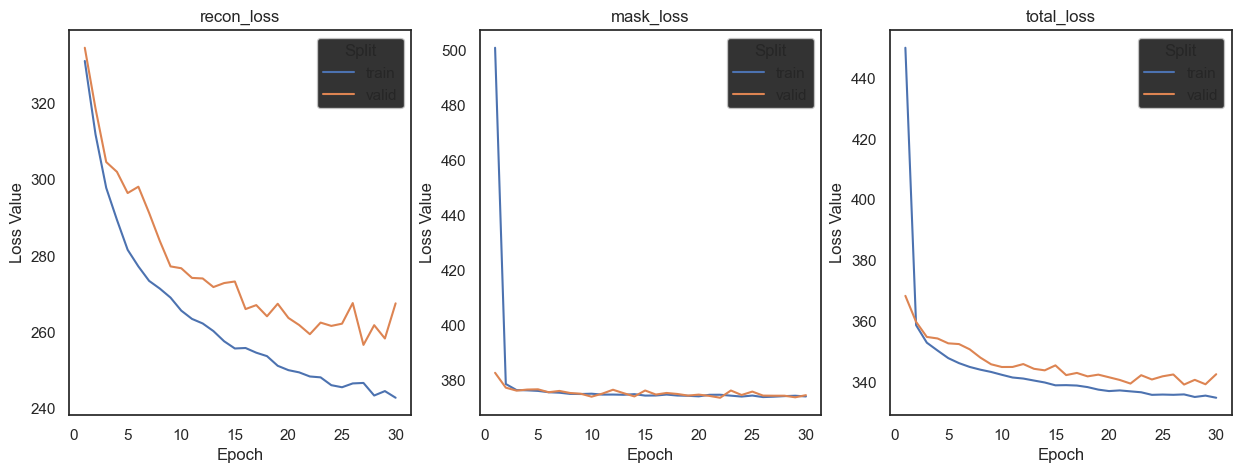

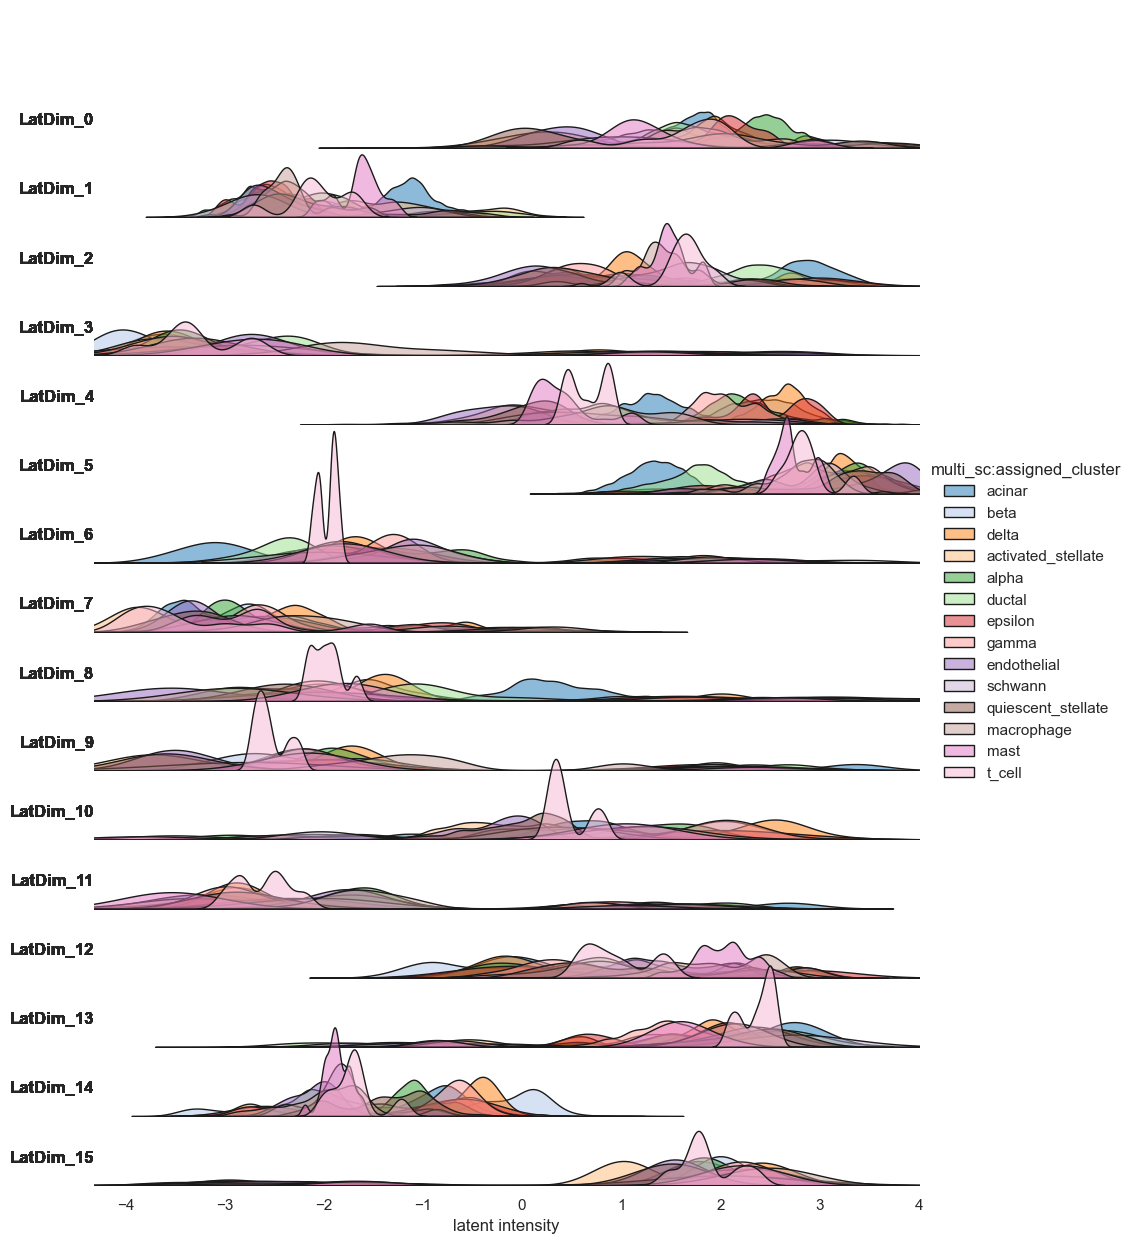

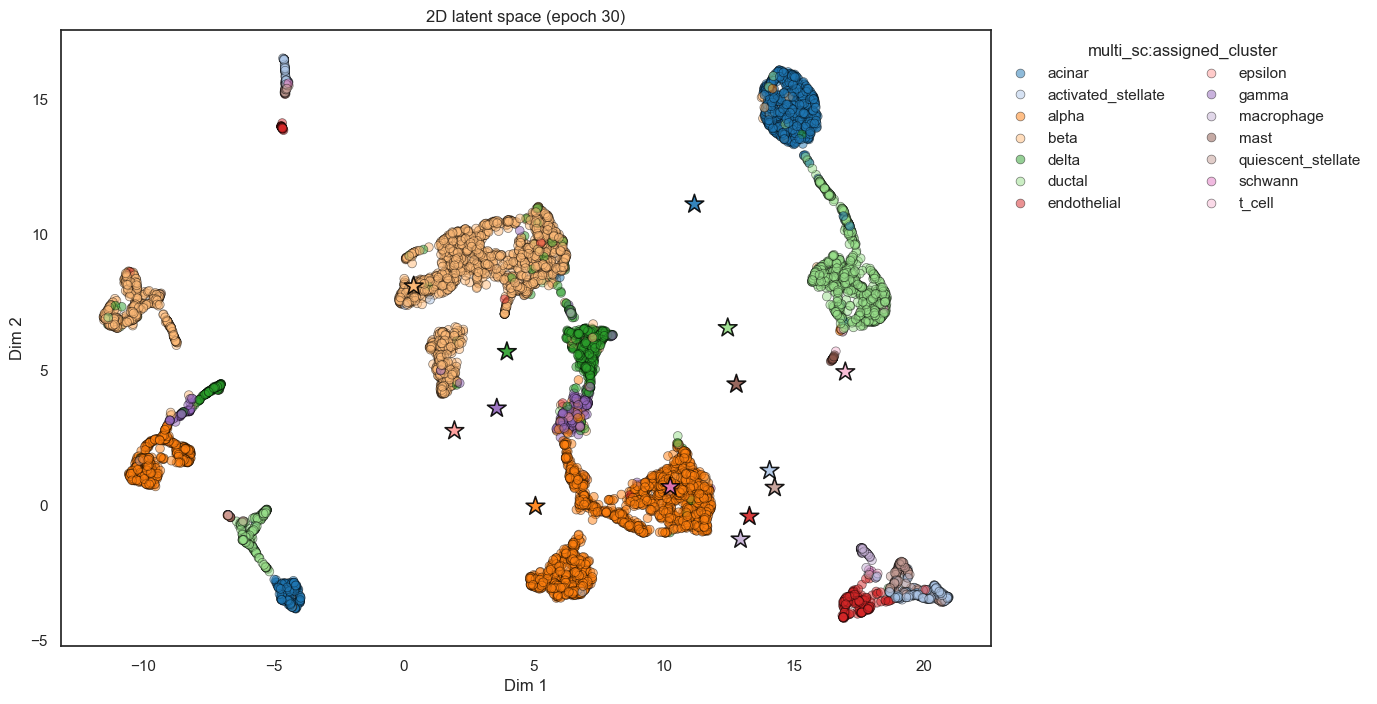

In [11]:
maskix.show_result()

In [23]:
config.latent_dim

16

### Consitency Check
We will gradually increase the probablity of masking, to see if the masking works as intended. We expect the Maskix to be similar to the Vanillix for propabilties near zero and to  be not working at all for probablities near 1

##### Vanillix Baseline


In [24]:
import autoencodix as acx
from autoencodix.data.datapackage import DataPackage
from autoencodix.configs.vanillix_config import VanillixConfig
from autoencodix.configs.default_config import DataCase


config = VanillixConfig(
    epochs=50,
    checkpoint_interval=10,
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
vanillix = acx.Vanillix(config=config)

In [25]:
result_vanillix = vanillix.run()

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc
Epoch 1 - Train Loss: 17990.0213
Sub-losses: recon_loss: 17990.0213
Epoch 1 - Valid Loss: 19977.7392
Sub-losses: recon_loss: 19977.7392
Epoch 2 - Train Loss: 17006.2687
Sub-losses: recon_loss: 17006.2687
Epoch 2 - Valid Loss: 19848.9785
Sub-losses: recon_loss: 19848.9785
Epoch 3 - Train Loss: 16850.8445
Sub-losses: recon_loss: 16850.8445
Epoch 3 - Valid Loss: 19803.2213
Sub-losses: recon_loss: 19803.2213
Epoch 4 - Train Loss: 16755.7319
Sub-losses: recon_loss: 16755.7319
Epoch 4 - Valid Loss: 19

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:34: UserWarning: Model weights plot is skipped since input dimension 17246 is larger than 3000 and heatmap would be too large.
  warnings.warn(


Creating plots ...


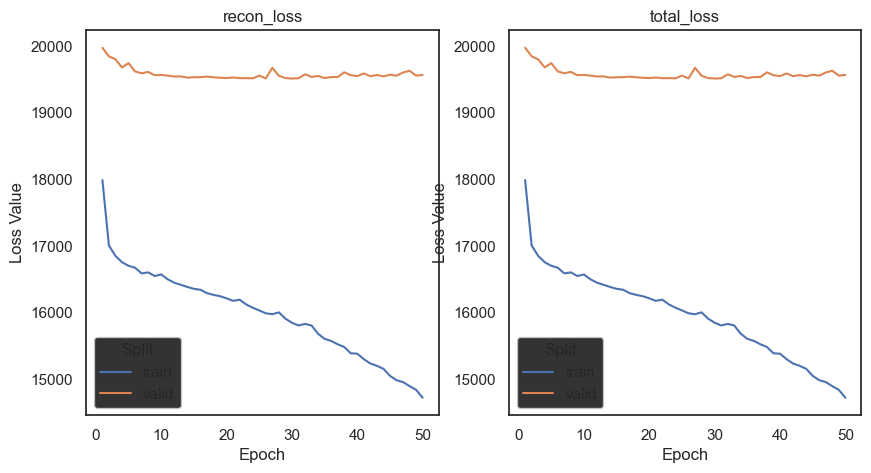

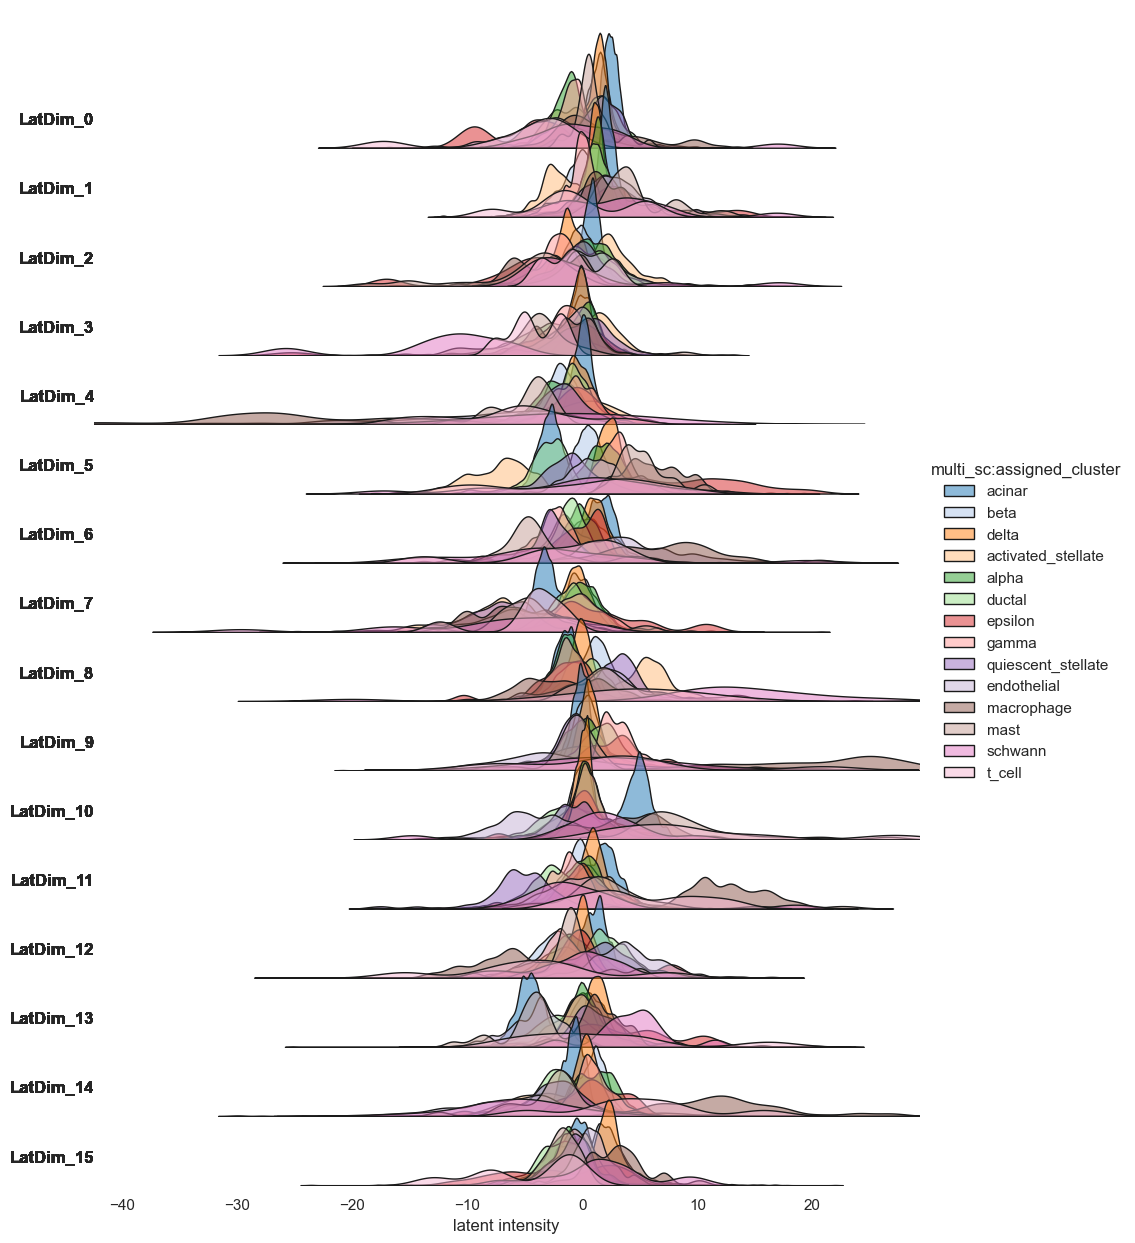

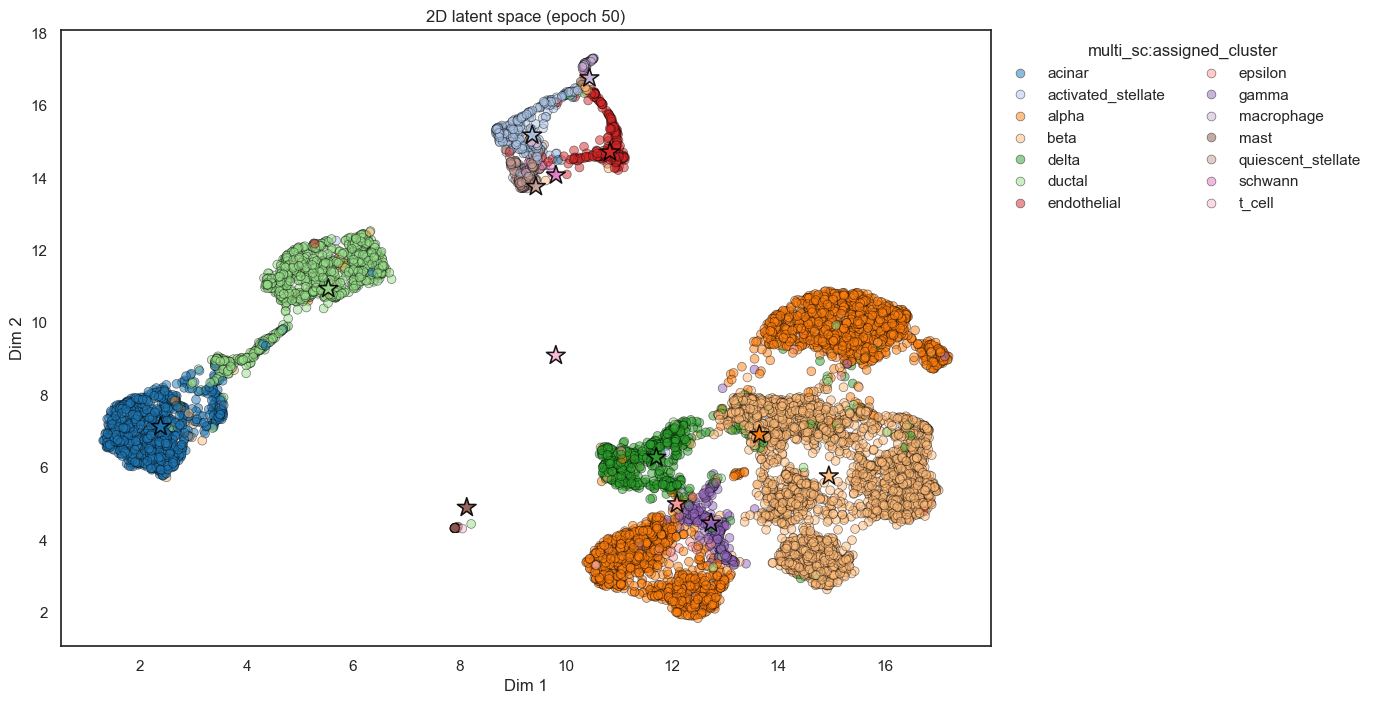

In [26]:
vanillix.show_result()

### Maskix Checks

In [ ]:
import autoencodix as acx
from autoencodix.configs import MaskixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase


probs = [0.0, 0.3, 0.6, 1.0]
pipelines = {}
for p in probs:
    sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
    config = MaskixConfig(
        epochs=50,
        checkpoint_interval=10,
        batch_size=64,
        maskix_swap_prob=p,
        data_config=DataConfig(
            annotation_columns=["multi_sc:assigned_cluster"],
            data_info={
                "multi_sc": DataInfo(
                    file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
                )
            },
        ),
        data_case=DataCase.MULTI_SINGLE_CELL,
    )
    maskix = acx.Maskix(config=config)
    result = maskix.run()
    pipelines[str(p)] = maskix

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 7983.2786
Sub-losses: recon_loss: 7278.3937, mask_loss: 8285.3721
Epoch 1 - Valid Loss: 6543.3099
Sub-losses: recon_loss: 9307.7448, mask_loss: 5358.5521


Creating plots ...


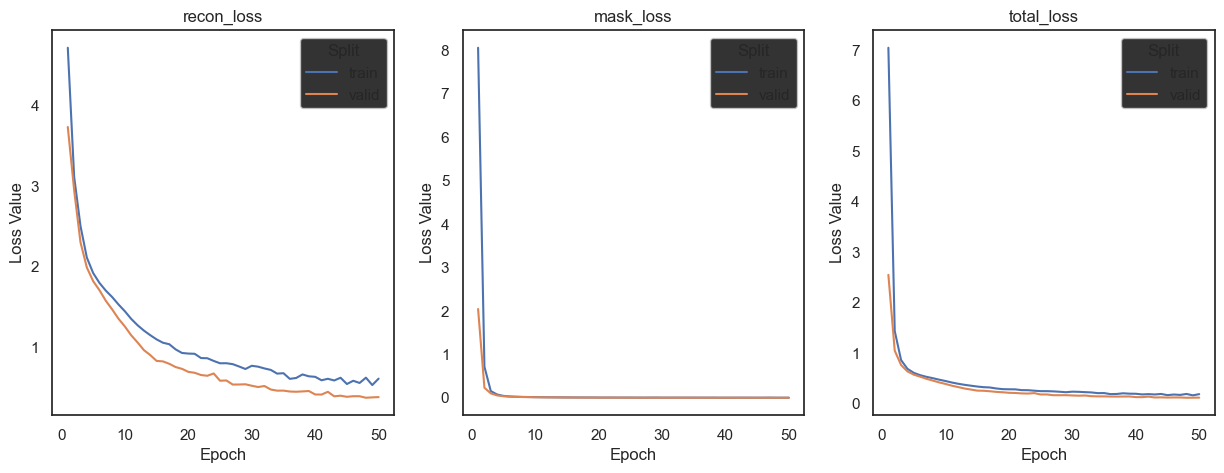

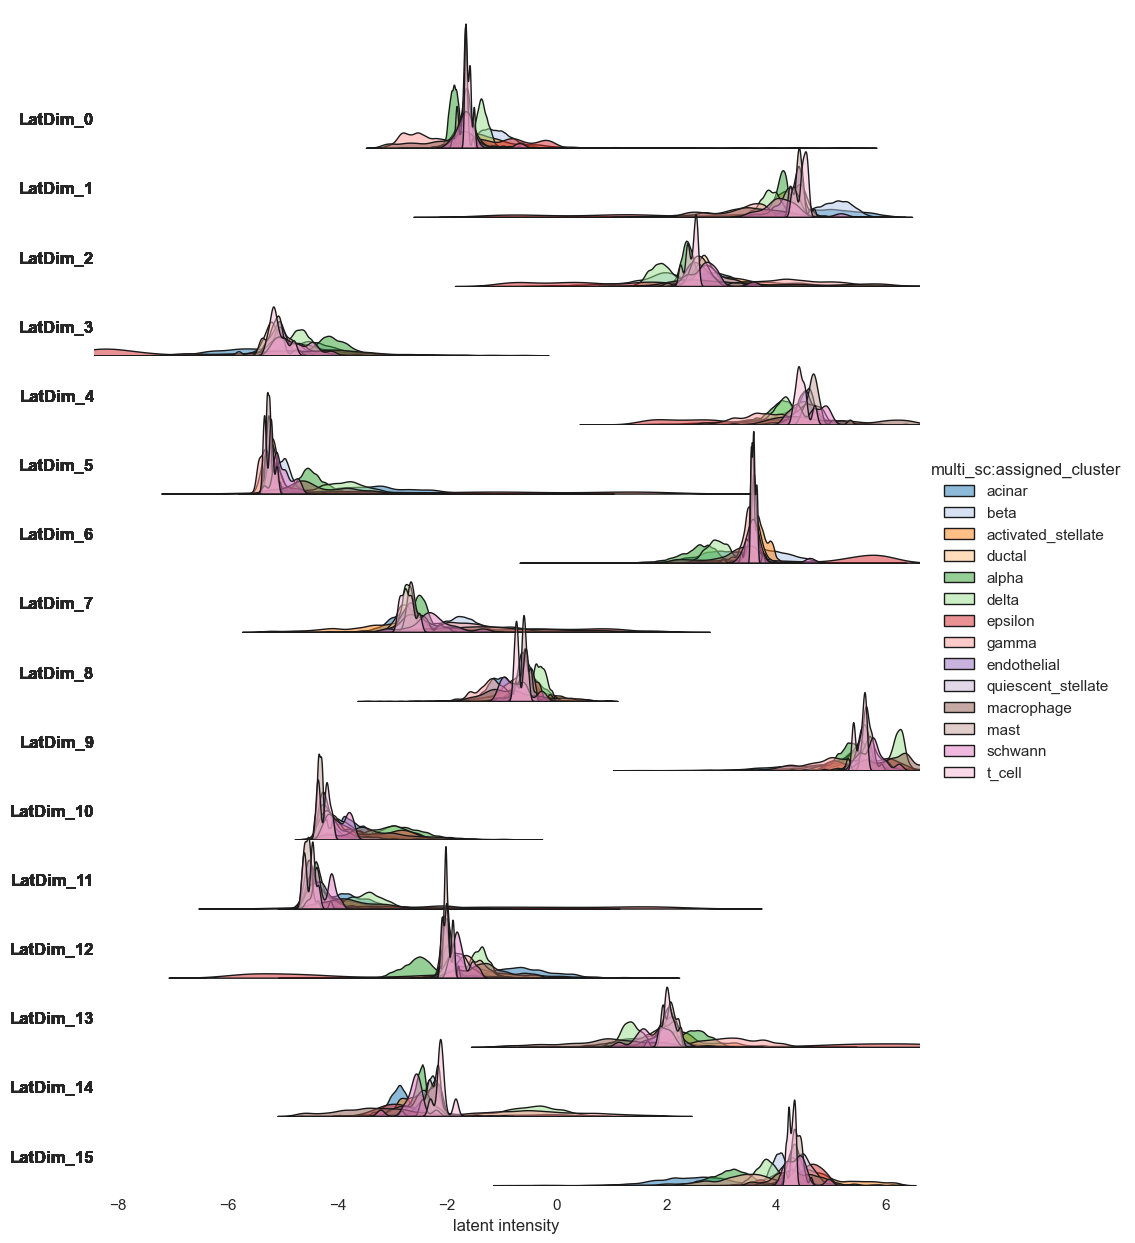

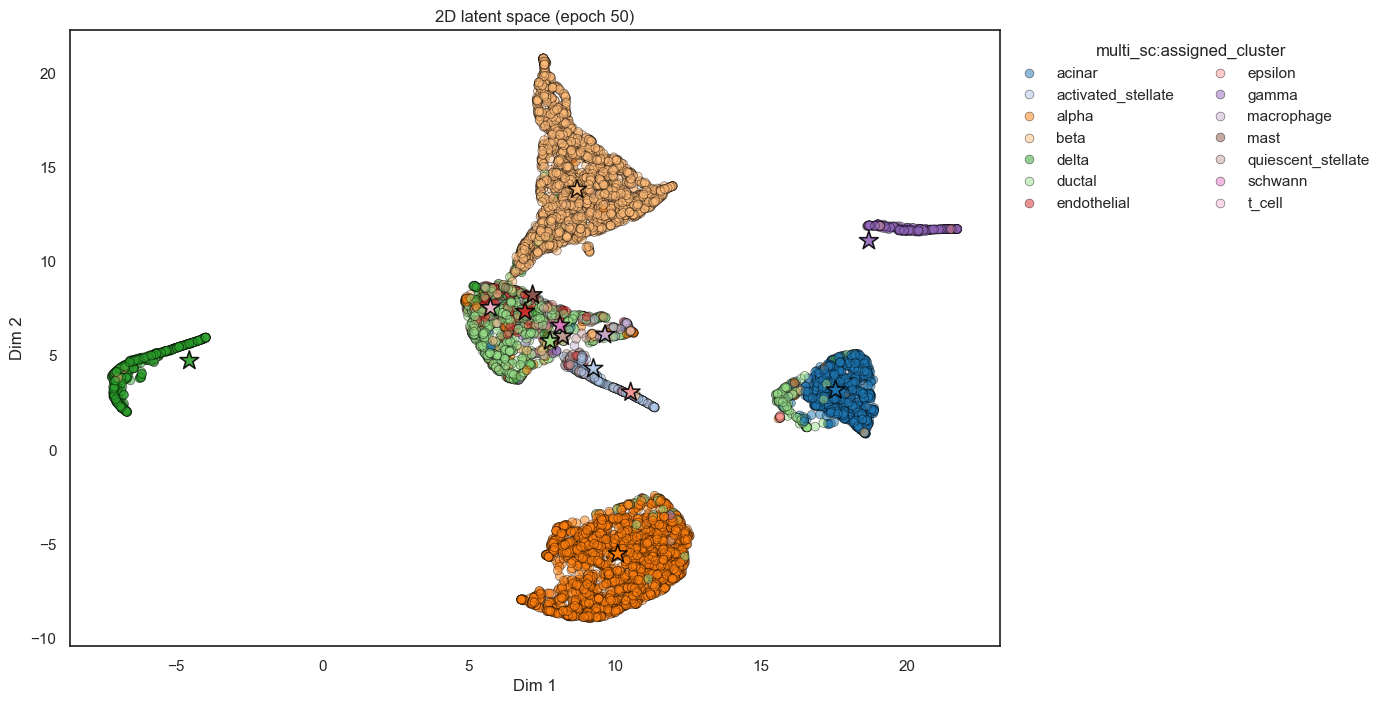

In [ ]:
maskix_zero = pipelines["0.0"]
maskix_zero.show_result()

Creating plots ...


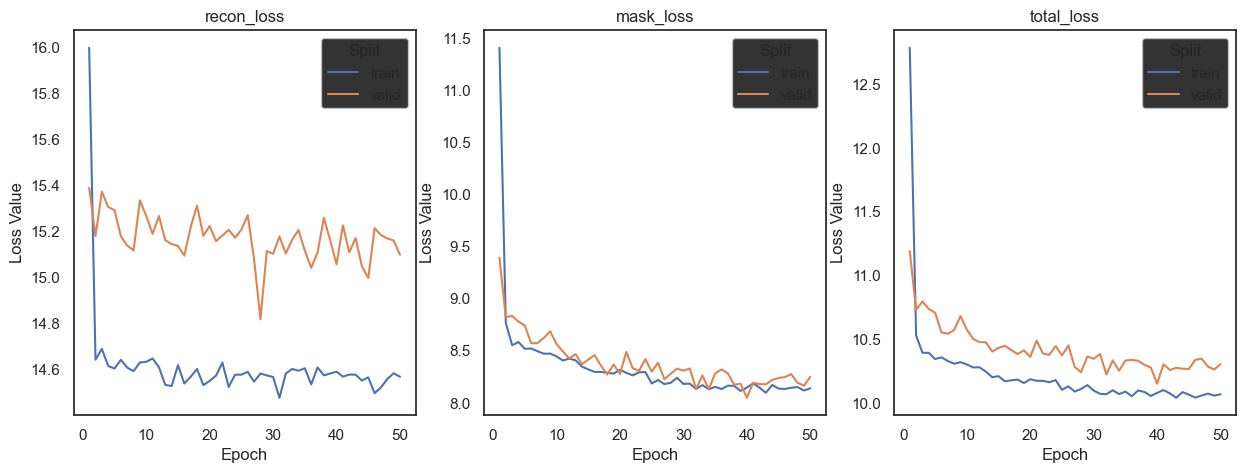

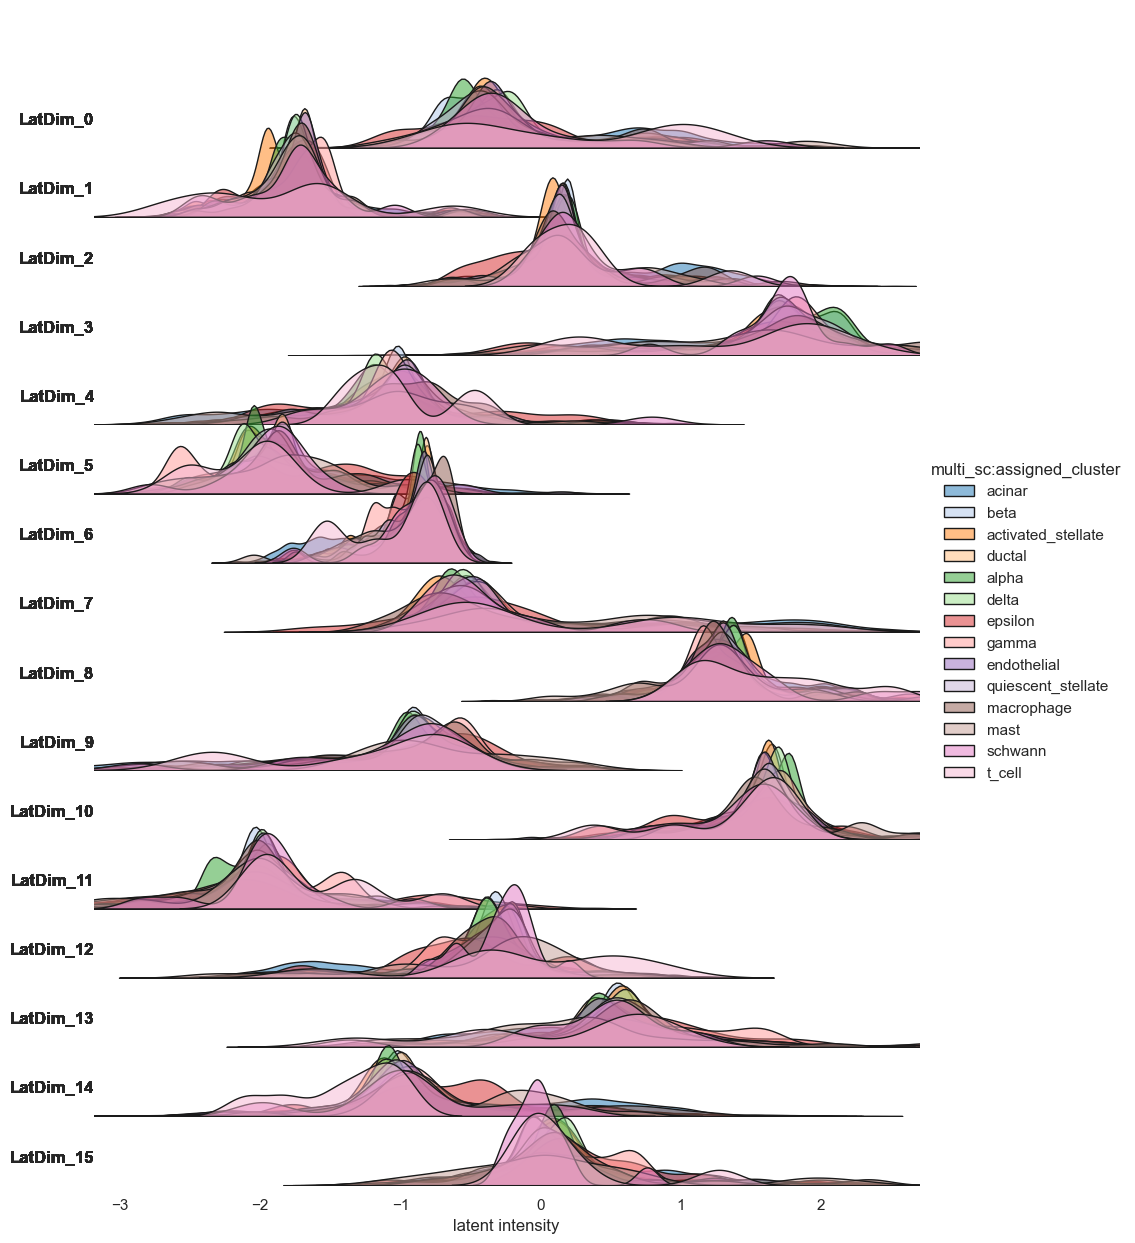

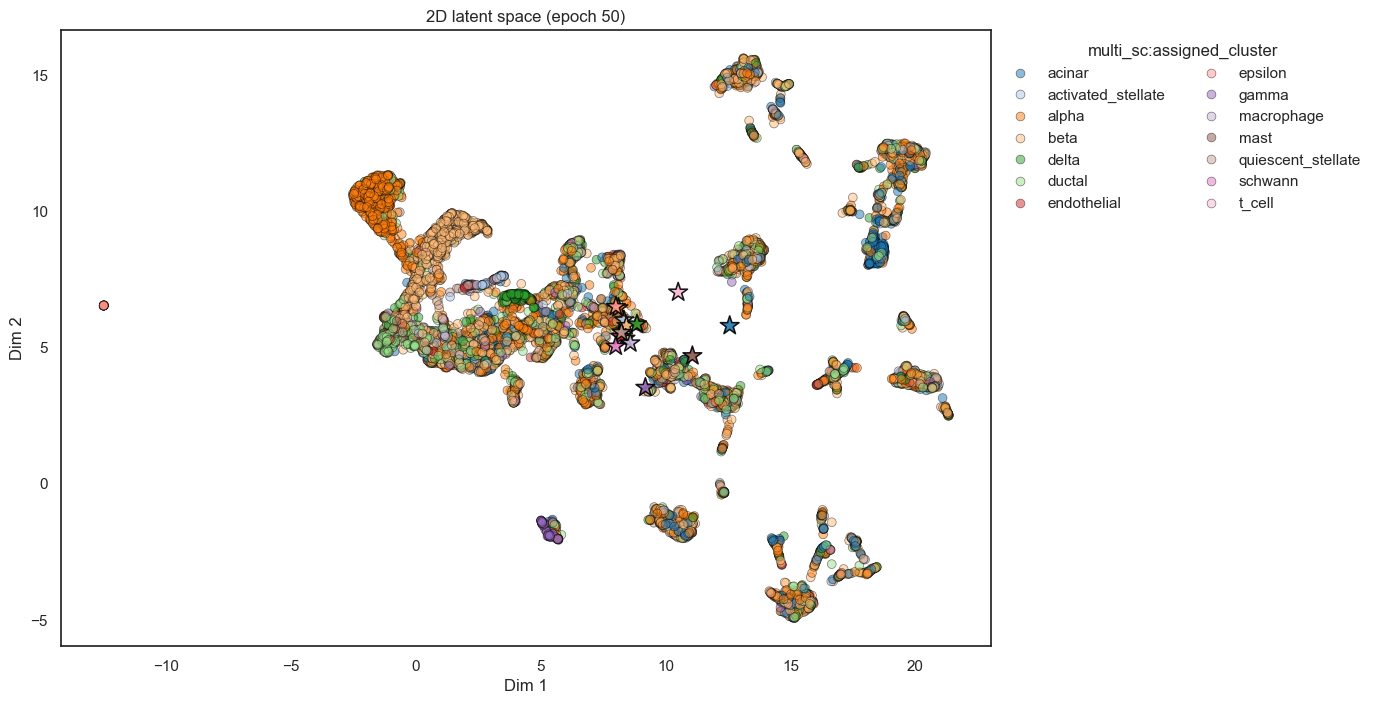

In [ ]:
maskix_zero = pipelines["1.0"]
maskix_zero.show_result()

Creating plots ...


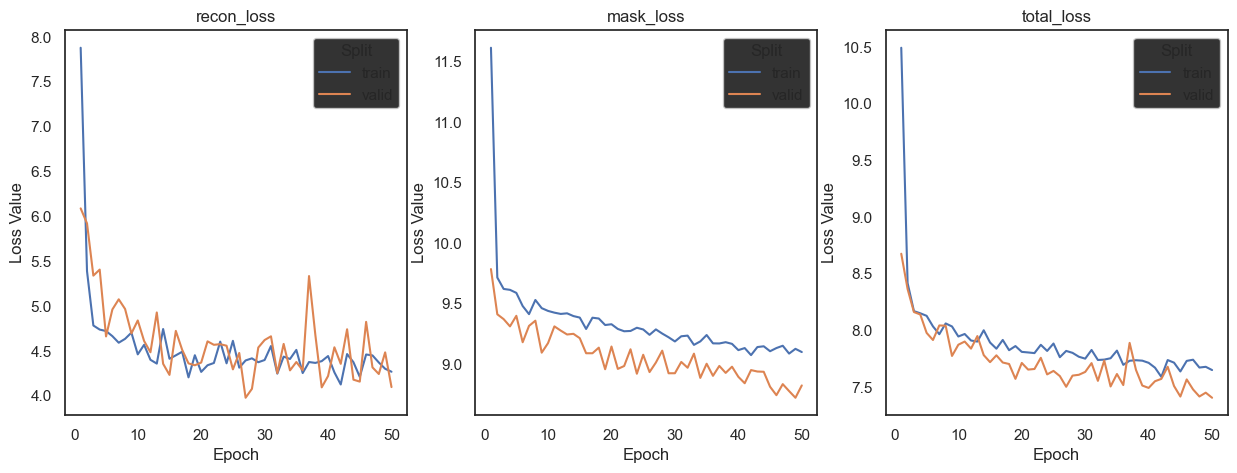

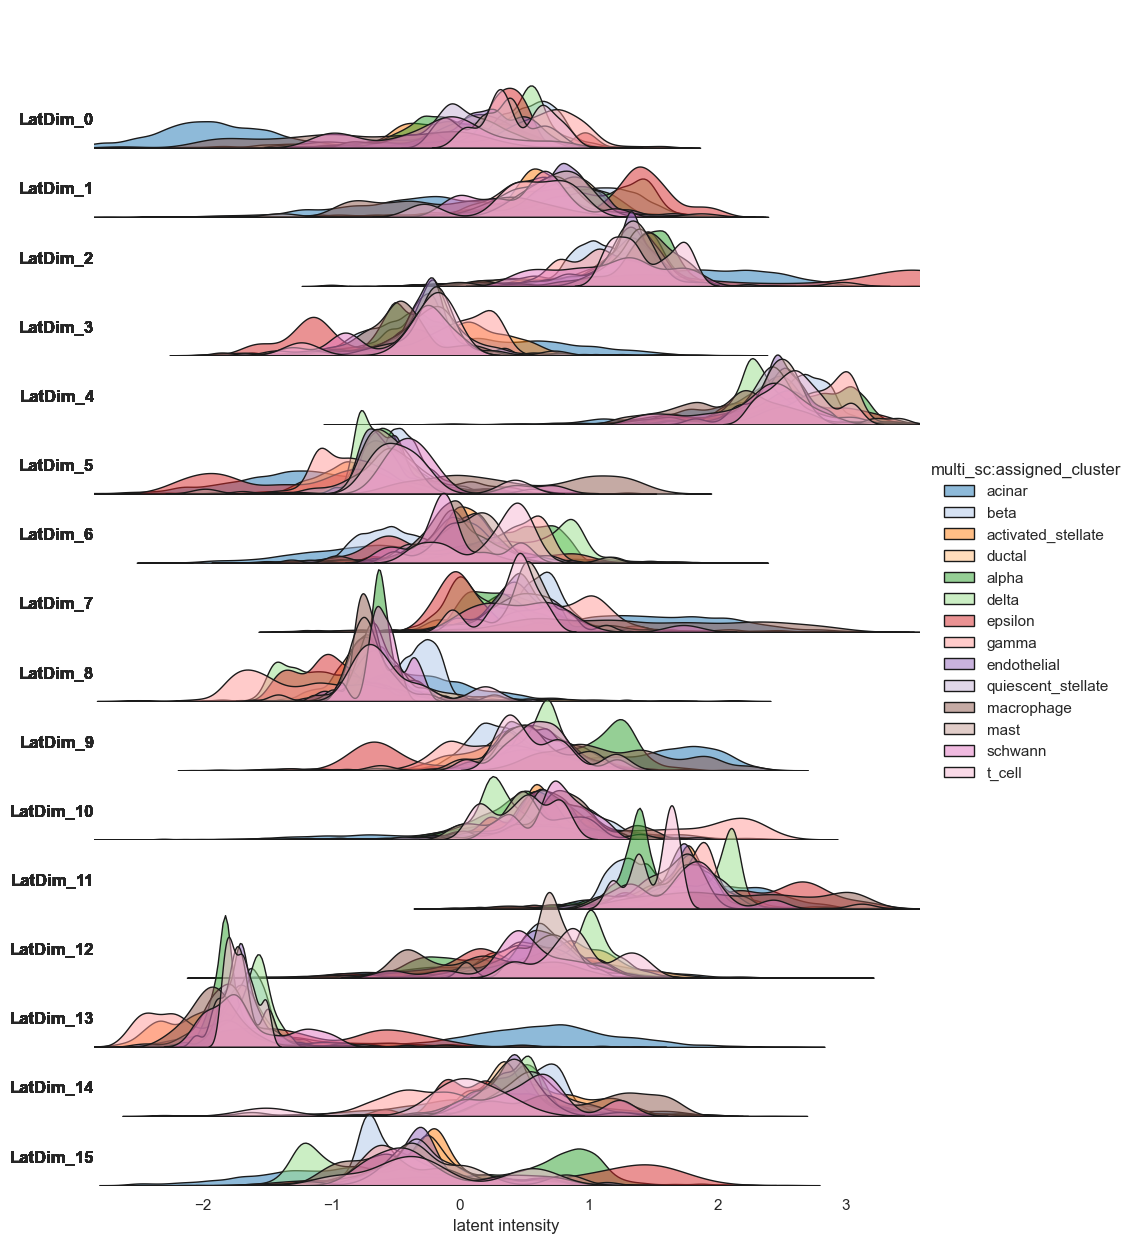

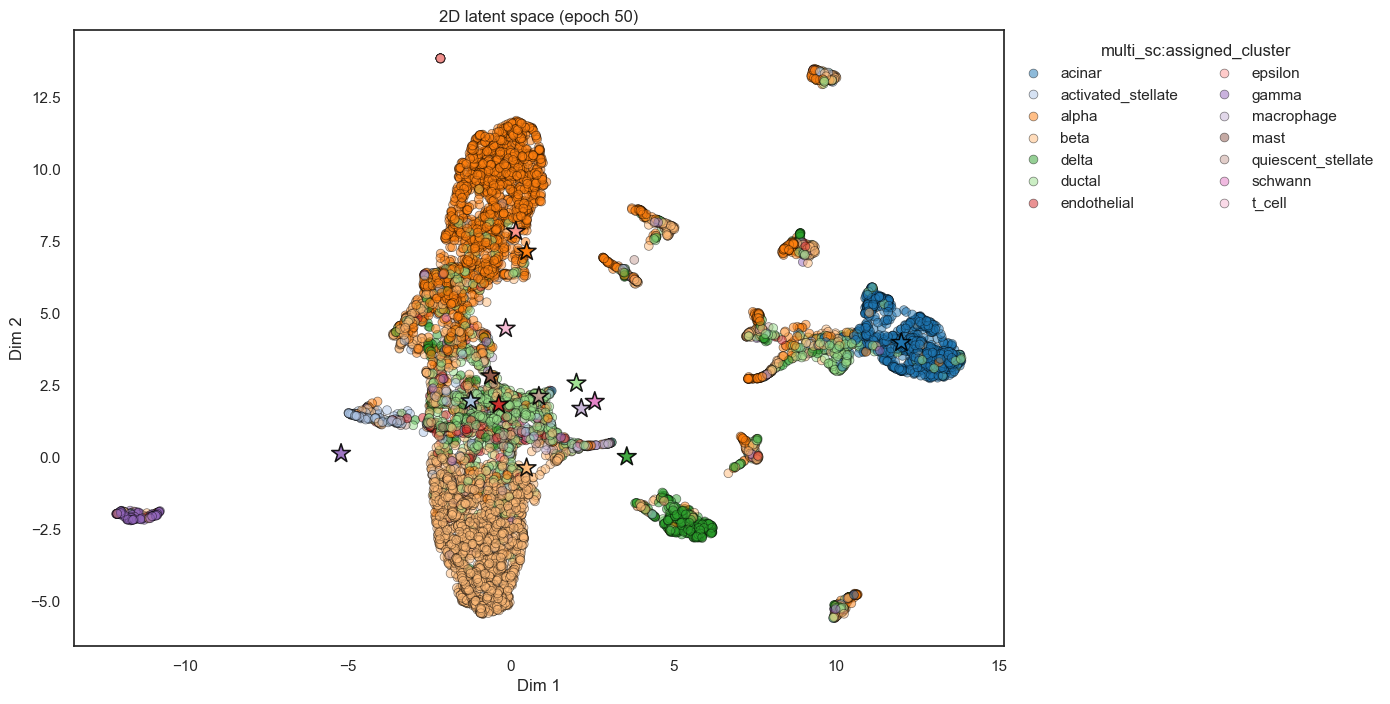

In [ ]:
maskix_zero = pipelines["0.3"]
maskix_zero.show_result()

Creating plots ...


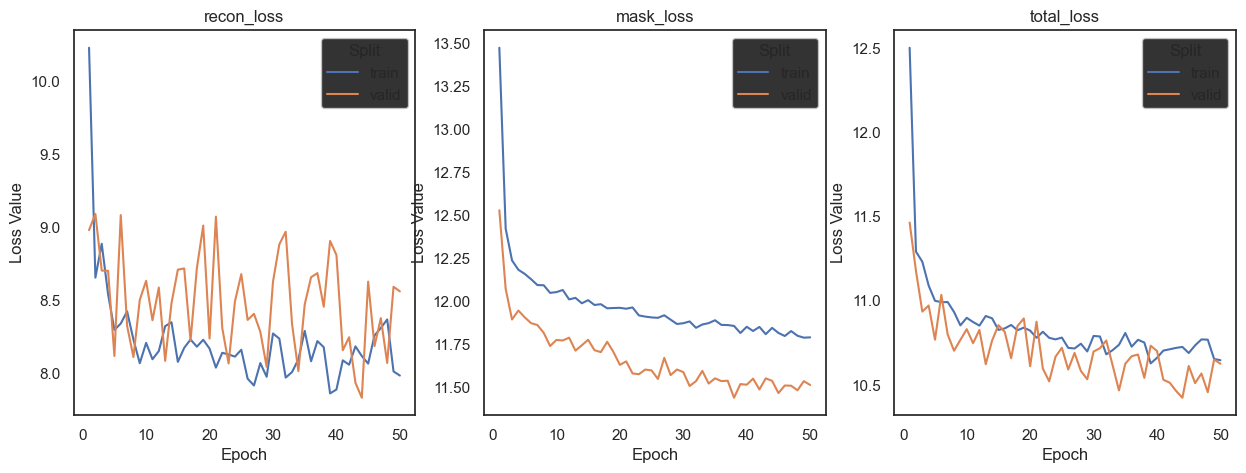

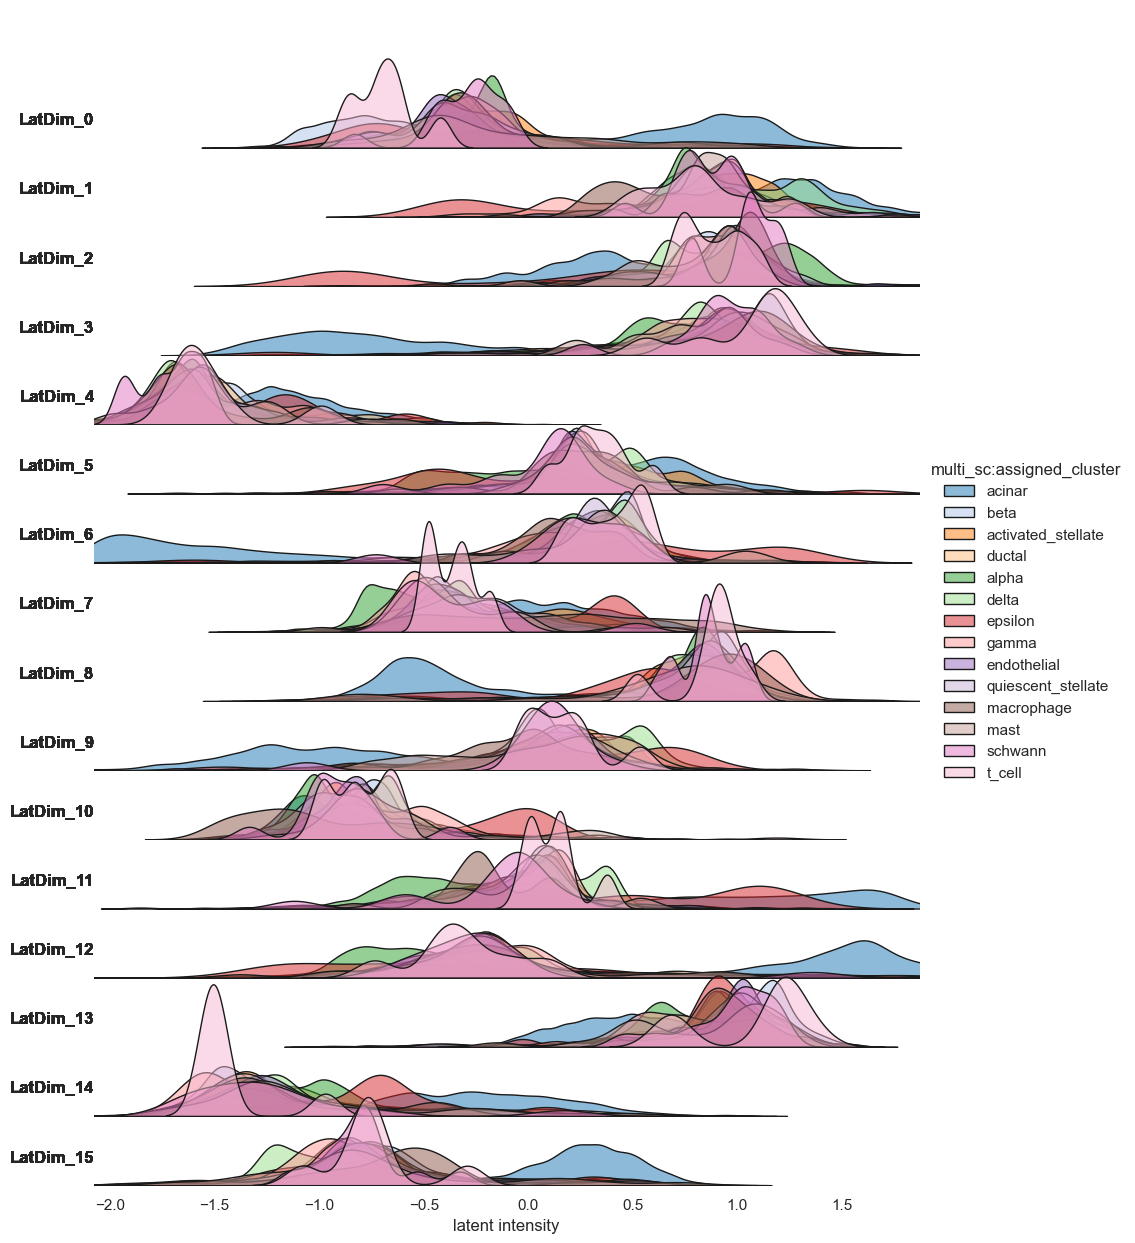

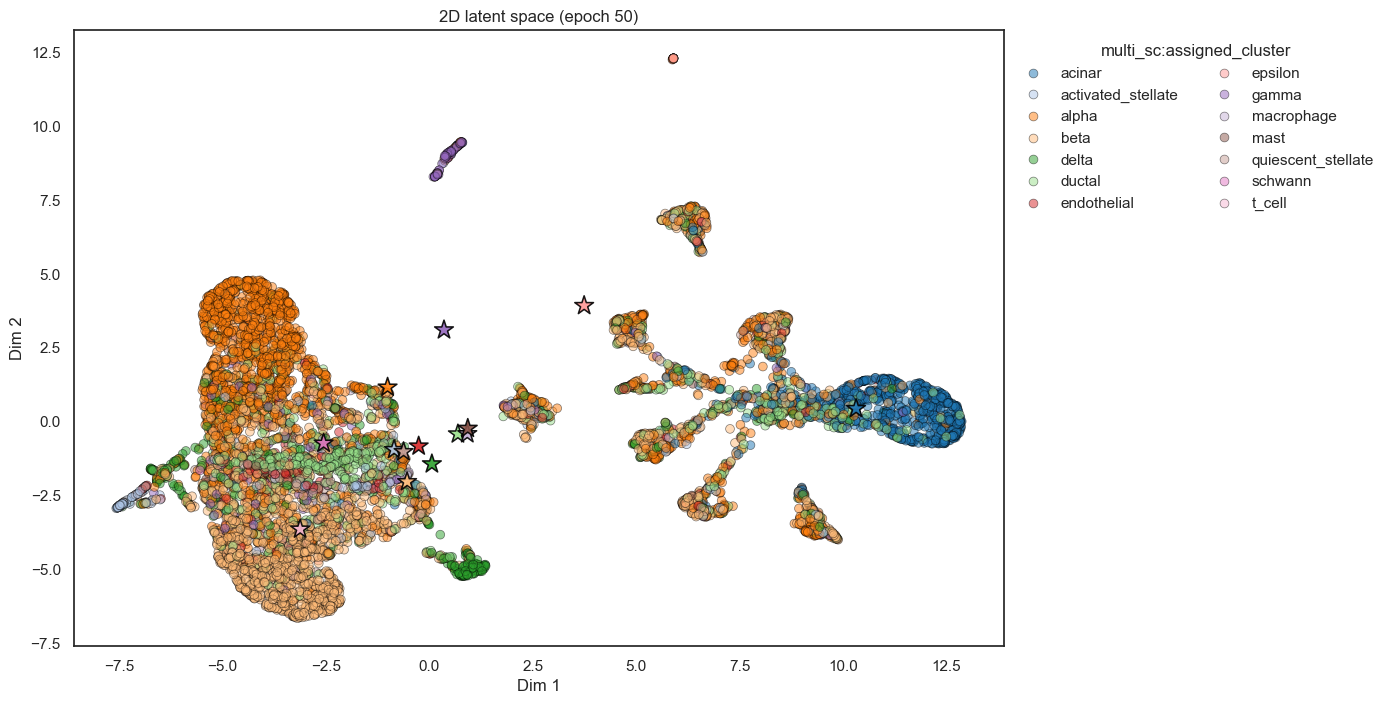

In [ ]:
maskix_zero = pipelines["0.6"]
maskix_zero.show_result()

## Adding a Custom Masking Function to `MaskixTrainer`

`MaskixTrainer` supports replacing its default corruption mechanism with a user-defined masking function. This enables experimentation with alternative masking strategies while ensuring compatibility with the trainer’s data flow.

## How to Add a Custom Masking Function

Provide your masking function at initialization:

```python
# We assume that config is defined and other imports are done (see above)

def my_masking_fn(x: torch.Tensor, strength: float = 0.2):
    noise = torch.randn_like(x) * strength
    return x + noise  # must return ONLY a single tensor in shape of input tensor

masking_fn_kwargs = {"strength": 0.1}
maskix = acx.Maskix(config=config, masking_fn, masking_fn_kwargs
)
```
## Requirements for a Custom Masking Function

A custom masking function must satisfy the following constraints:

1. **It must accept a `torch.Tensor` as the first positional argument.**  
   The trainer passes the input mini-batch `X` directly into the function.

2. **It must return exactly one value: a `torch.Tensor`.**  
   The trainer does not consume or propagate additional outputs.  
   Returning tuples or multiple values is not allowed.

3. **The returned tensor must have the same shape as the input tensor.**  
   Any shape mismatch will raise a validation error.

4. **The function must operate on the device of the input tensor.**  
   The function must not assume the tensor resides on the CPU; it must operate on the device of `x`.

5. **Any additional parameters must be passed via `masking_fn_kwargs`.**  
   These keyword arguments provide a clean separation between trainer configuration and masking logic.

### Example
This is our default masking method:
```python
    def _maskix_hook(
        self, X: torch.Tensor
    ) -> torch.Tensor
        # expand probablities for bernoulli sampling to match input shape
        probs = self._mask_probas.expand(X.shape)

        # Create the Boolean Mask (1 = Swap, 0 = Keep)
        should_swap = torch.bernoulli(probs).bool()

        # COLUMN-WISE SHUFFLING
        # We generate a random float matrix and argsort it along dim=0.
        # This gives us independent random indices for every column.
        rand_indices = torch.rand(X.shape, device=X.device).argsort(dim=0)

        # Use gather to reorder X based on these random indices
        shuffled_X = torch.gather(X, 0, rand_indices)
        corrupted_X = torch.where(should_swap, shuffled_X, X)

        return corrupted_X
```



In [ ]:
import torch
import autoencodix as acx
from autoencodix.configs import MaskixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase


def my_masking_fn(x: torch.Tensor, strength: float = 0.2):
    # Noise is created with the same shape, dtype, and device as `x`
    noise = torch.randn_like(x) * strength
    return x + noise


kwargs = {"strength": 0.5}


sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
config = MaskixConfig(
    epochs=5,
    checkpoint_interval=2,
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
maskix = acx.Maskix(config=config, masking_fn=my_masking_fn, masking_fn_kwargs=kwargs)

In [ ]:
result = maskix.run()

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 9.4744
Sub-losses: recon_loss: 11.9306, mask_loss: 8.4217
Epoch 1 - Valid Loss: 4.4978
Sub-losses: recon_loss: 9.3459, mask_loss: 2.4200
Epoch 2 - Train Loss: 3.1610
Sub-losses: recon_loss: 8.2225, mask_loss: 0.9918
Epoch 2 - Valid Loss: 2.6776
Sub-losses: recon_loss: 7.9357, mask_loss: 0.4241
Epoch 3 - Train Loss: 2.3450
Sub-losses: recon_loss: 7.1810, mask_loss: 0.2725
Epoch 3 - Valid Loss: 2.1901
Sub-losses: recon_loss: 6.8270, mask_loss: 0.2029
Epoch 4 - Train Loss: 2.0177
Sub-losses: recon_loss: 6.3668, mask_loss: 0.1538
Epoch 4 - Valid Loss: 1.8895
Sub-losses: recon_loss: 6.0047, mask_loss: 0.1258
Epoch 5 - Train Loss: 1.8168
Sub-losses: recon_loss: 5.8171, mask_loss: 0.1024
Epoch 5 - Valid Loss: 1.6982
Sub-losses: recon_loss: 5.4441, mask_loss: 0.0928


In [ ]:
enc_sizes = [64, 32, 16, 8]
enc_sizes[:-1]
enc_sizes[1:]

[32, 16, 8]

In [ ]:
from itertools import pairwise

enc_dim = [784, 256, 128, 64]

for i, (in_features, out_features) in enumerate(pairwise(enc_dim)):
    print(f"Layer {i}: {in_features} -> {out_features}")

Layer 0: 784 -> 256
Layer 1: 256 -> 128
Layer 2: 128 -> 64


## Impute Step

You can also input corrupted/missing data and use `Maskix` to impute the data. Here we recommend using a custom masking function. For example, if you want to impute missing values, an imputer could randomly replace values with zeros.

Then you could use `Maskix` to clean your data and use the cleaned data to run your analysis, for example another autoencodix pipeline or anything else. In our mock example we will do the following:

- Create corrupted data with missing values
- Remove the "missing" data
- Train Maskix with clean data, but with a custom imputer that mimics missing data
- Feed corrupted data into trained Maskix and obtain imputed data
- Train Varix with:
    - Original data with missing values
    - Imputed data
- Compare results

#### Create Corrupted Data
We will use our single-cell example from before and use maskix to preprocess the data, which makes the artificall corruption process more robust, because we make sure to corrupt informative features/samples.

##

In [64]:
import torch
import autoencodix as acx
from autoencodix.configs import MaskixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase


sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
config = MaskixConfig(
    epochs=30,
    checkpoint_interval=2,
    k_filter=1000,
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                file_path=sc_path, is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
maskix_orig = acx.Maskix(config=config)
maskix_orig.preprocess()
data = maskix_orig.result.datasets

Number of common cells: 8569
Index(['barcode', 'assigned_cluster', 'sample_id'], dtype='object')
mudata: View of MuData object with n_obs × n_vars = 8569 × 20125
  obs:	'barcode', 'assigned_cluster', 'sample_id'
  1 modality
    multi_sc:	8569 x 20125
      obs:	'barcode', 'assigned_cluster', 'sample_id'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc


Now we will randomly set data do zero with.

In [47]:

import torch
import copy
from autoencodix.data._numeric_dataset import NumericDataset
def drop_samples(ds: NumericDataset):
    """Randomly drops samples in .data and according .metadata (pd.DataFrame) and sample_ids"""
    data = ds.data
    n_samples = data.shape[0]
    drop_prob = 0.3
    keep_mask = torch.bernoulli((1 - drop_prob) * torch.ones(n_samples)).bool()
    # replace entries with zero
    imputed_data = data.clone()
    imputed_data[~keep_mask] = 0

    missing_data = data[keep_mask]
    missing_metadata = ds.metadata.iloc[keep_mask.cpu().numpy()].reset_index(drop=True)
    missing_sample_ids = [sid for i, sid in enumerate(ds.sample_ids) if keep_mask[i]]
    ds_with_missing = copy.deepcopy(ds)
    ds_with_missing.data = missing_data
    ds_with_missing.metadata = missing_metadata
    ds_with_missing.sample_ids = missing_sample_ids


    ds_with_zero = copy.deepcopy(ds)
    ds_with_zero.data = imputed_data
    ds_with_zero.metadata = ds.metadata
    ds_with_zero.sample_ids = ds.sample_ids
    return ds_with_missing, ds_with_zero

ds_with_missing = copy.deepcopy(data)
ds_with_zero = copy.deepcopy(data)
missing_train, ds_with_zero_train = drop_samples(ds_with_missing.train)

print(f"Original train data shape: {data.train.data.shape}, shape after corruption: {missing_train.data.shape}")
missing_test, ds_with_zero_test = drop_samples(data.test)
print(f"Original test data shape: {data.test.data.shape}, shape after corruption: {missing_test.data.shape}")
missing_valid, ds_with_zero_valid    = drop_samples(data.valid)
print(f"Original valid data shape: {data.valid.data.shape}, shape after corruption: {missing_valid.data.shape}")
ds_with_missing.train= missing_train
ds_with_missing.test = missing_test
ds_with_missing.valid = missing_valid


ds_with_zero.train= ds_with_zero_train
ds_with_zero.test = ds_with_zero_test
ds_with_zero.valid = ds_with_zero_valid
# clean corruped samples by removing zero values from dataset (drop samples) and also 




Original train data shape: torch.Size([5998, 1000]), shape after corruption: torch.Size([4179, 1000])
Original test data shape: torch.Size([1715, 1000]), shape after corruption: torch.Size([1179, 1000])
Original valid data shape: torch.Size([856, 1000]), shape after corruption: torch.Size([596, 1000])


Now we train our Maskix with this clean data, but we will pass a custom imputer that will simulate missing values

In [46]:
import torch
import autoencodix as acx
from autoencodix.configs import MaskixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase


def my_imputer(x: torch.Tensor) -> torch.Tensor:
    "randomly replaces value with zero"
    rand_mask = torch.bernoulli(0.3 * torch.ones(x.shape, device=x.device)).bool()
    rand_mask.to(x.device)
    imputed_x = torch.where(rand_mask, torch.zeros_like(x, device=x.device), x)
    return imputed_x


sc_path = os.path.join("data/raw", "GSE84133_human_combined_final.h5ad")
config = MaskixConfig(
    epochs=30,
    checkpoint_interval=2,
    k_filter=3000,
    skip_preprocessing=True,
    batch_size=64,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={
            "multi_sc": DataInfo(
                 is_single_cell=True, data_type="NUMERIC"
            )
        },
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)
maskix = acx.Maskix(config=config, masking_fn=my_imputer, data=ds_with_missing)
result = maskix.run()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 570.1938
Sub-losses: recon_loss: 360.6280, mask_loss: 660.0077
Epoch 1 - Valid Loss: 538.6883
Sub-losses: recon_loss: 353.5009, mask_loss: 618.0543
Epoch 2 - Train Loss: 533.9605
Sub-losses: recon_loss: 347.0940, mask_loss: 614.0461
Epoch 2 - Valid Loss: 532.3102
Sub-losses: recon_loss: 344.5831, mask_loss: 612.7646
Epoch 3 - Train Loss: 530.3089
Sub-losses: recon_loss: 337.2323, mask_loss: 613.0560
Epoch 3 - Valid Loss: 527.9316
Sub-losses: recon_loss: 330.3795, mask_loss: 612.5967
Epoch 4 - Train Loss: 528.2926
Sub-losses: recon_loss: 330.9867, mask_loss: 612.8523
Epoch 4 - Valid Loss: 529.7565
Sub-losses: recon_loss: 334.7373, mask_loss: 613.3361
Epoch 5 - Train Loss: 527.1824
Sub-losses: recon_loss: 328.2501, mask_loss: 612.4391
Epoch 5 - Valid Loss: 526.9451
Sub-losses: recon_loss: 326.9113, mask_loss: 612.6738
Epoch 6 - Train Loss: 527.4472
Sub-losses: recon_loss: 328.8099, mask_loss: 612.5775
Epoch 6 - Valid Loss: 525.9314
Sub-losses: recon_loss: 323.5324, 

No we use the trained maskix to impute our missing data

Now, we can use the fitted model and use a corrupted input with missing to get a reconstruction without missing values.


In [51]:
mo_train = maskix.impute(ds_with_zero.train.data)
recons_train = mo_train.reconstruction

mo_test = maskix.impute(ds_with_zero.test.data)
recons_test = mo_test.reconstruction

mo_valid = maskix.impute(ds_with_zero.valid.data)
recons_valid = mo_valid.reconstruction


ds_imputed = copy.deepcopy(ds_with_zero)
ds_imputed.train.data = recons_train
ds_imputed.test.data = recons_test
ds_imputed.valid.data = recons_valid

We can compare the loss between the imputed data and the original and the reconstructed data and the original.

In [ ]:
%%capture
# ground truth without missing values
result_orig = maskix_orig.run()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/losses/maskix_loss.py:38: UserWarning: You chose loss reduction: sum, this deviates from the implementation in the literature for this architecture, the authors used 'mean'
  warnings.warn(


Epoch 1 - Train Loss: 453.9295
Sub-losses: recon_loss: 324.0708, mask_loss: 509.5833
Epoch 1 - Valid Loss: 374.5607
Sub-losses: recon_loss: 349.1409, mask_loss: 385.4549
Epoch 2 - Train Loss: 362.9903
Sub-losses: recon_loss: 317.0998, mask_loss: 382.6577
Epoch 2 - Valid Loss: 364.6499
Sub-losses: recon_loss: 331.1971, mask_loss: 378.9869
Epoch 3 - Train Loss: 358.4036
Sub-losses: recon_loss: 307.9447, mask_loss: 380.0288
Epoch 3 - Valid Loss: 359.2031
Sub-losses: recon_loss: 315.9495, mask_loss: 377.7403
Epoch 4 - Train Loss: 357.2502
Sub-losses: recon_loss: 304.5524, mask_loss: 379.8350
Epoch 4 - Valid Loss: 358.7852
Sub-losses: recon_loss: 312.6051, mask_loss: 378.5766
Epoch 5 - Train Loss: 355.9559
Sub-losses: recon_loss: 301.8220, mask_loss: 379.1561
Epoch 5 - Valid Loss: 357.4192
Sub-losses: recon_loss: 310.0292, mask_loss: 377.7292
Epoch 6 - Train Loss: 354.9233
Sub-losses: recon_loss: 298.8185, mask_loss: 378.9682
Epoch 6 - Valid Loss: 356.6257
Sub-losses: recon_loss: 308.8273, 

In [ ]:
from torch.nn.functional import mse_loss
original_train = result_orig.datasets.train.data
original_recon = result_orig.reconstructions.get(split="train", epoch=-1)
original_recon_tensor = torch.from_numpy(original_recon)
loss = mse_loss(original_recon_tensor, original_train)
print(f"MSE Loss original reconstruction: {loss}")
loss_imputed = mse_loss(recons_train.to("cpu"), original_train)
print(f"MSE Loss imputed reconstruction: {loss_imputed}")


MSE Loss original reconstruction: 0.8363521099090576
MSE Loss imputed reconstruction: 0.86027991771698


Finally, you can use this data as input for other autoencoders like `varix` or `vanillix`, but also use it for maskix.
We will train two Varix models, one with the missing data and one with the imputed data and compare the results

In [73]:
original_train.shape

torch.Size([5998, 1000])

In [75]:
recons_train.shape

torch.Size([5998, 1000])

In [58]:
import autoencodix as acx
from autoencodix.configs import VarixConfig
from autoencodix.configs.default_config import DataInfo, DataConfig, DataCase
from autoencodix.data._datasetcontainer import DatasetContainer
import copy

config = VarixConfig(
    epochs=50,
    checkpoint_interval=10,
    batch_size=64,
    skip_preprocessing=True,
    data_config=DataConfig(
        annotation_columns=["multi_sc:assigned_cluster"],
        data_info={"multi_sc": DataInfo(is_single_cell=True, data_type="NUMERIC")},
    ),
    data_case=DataCase.MULTI_SINGLE_CELL,
)

varix_imputed = acx.Varix(config=config, data=ds_imputed)
varix_missing = acx.Varix(config=config, data=ds_with_zero)

In [59]:
result_imputed = varix_imputed.run()
result_missing = varix_missing.run()

Epoch 1 - Train Loss: 198.9546
Sub-losses: recon_loss: 198.9494, var_loss: 0.0052, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 134.7447
Sub-losses: recon_loss: 134.7437, var_loss: 0.0010, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 135.3972
Sub-losses: recon_loss: 135.3855, var_loss: 0.0117, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 120.4243
Sub-losses: recon_loss: 120.4237, var_loss: 0.0006, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 115.0096
Sub-losses: recon_loss: 115.0073, var_loss: 0.0023, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 90.8131
Sub-losses: recon_loss: 90.8124, var_loss: 0.0008, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 106.1954
Sub-losses: recon_loss: 106.1941, var_loss: 0.0013, anneal_factor: 0.0002, effective_beta_factor: 0.0000
Epoch 4 - Valid Loss: 78.6768
Sub-losses: recon_lo

Creating plots ...


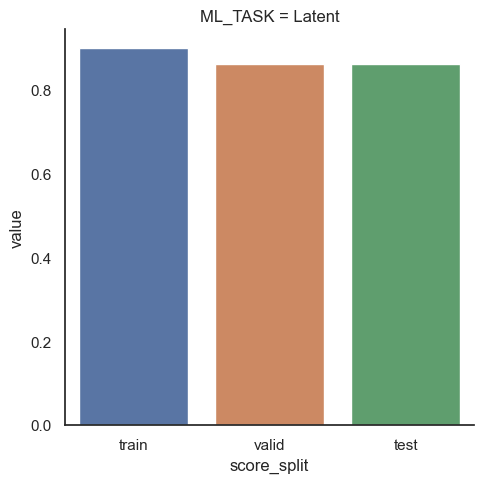

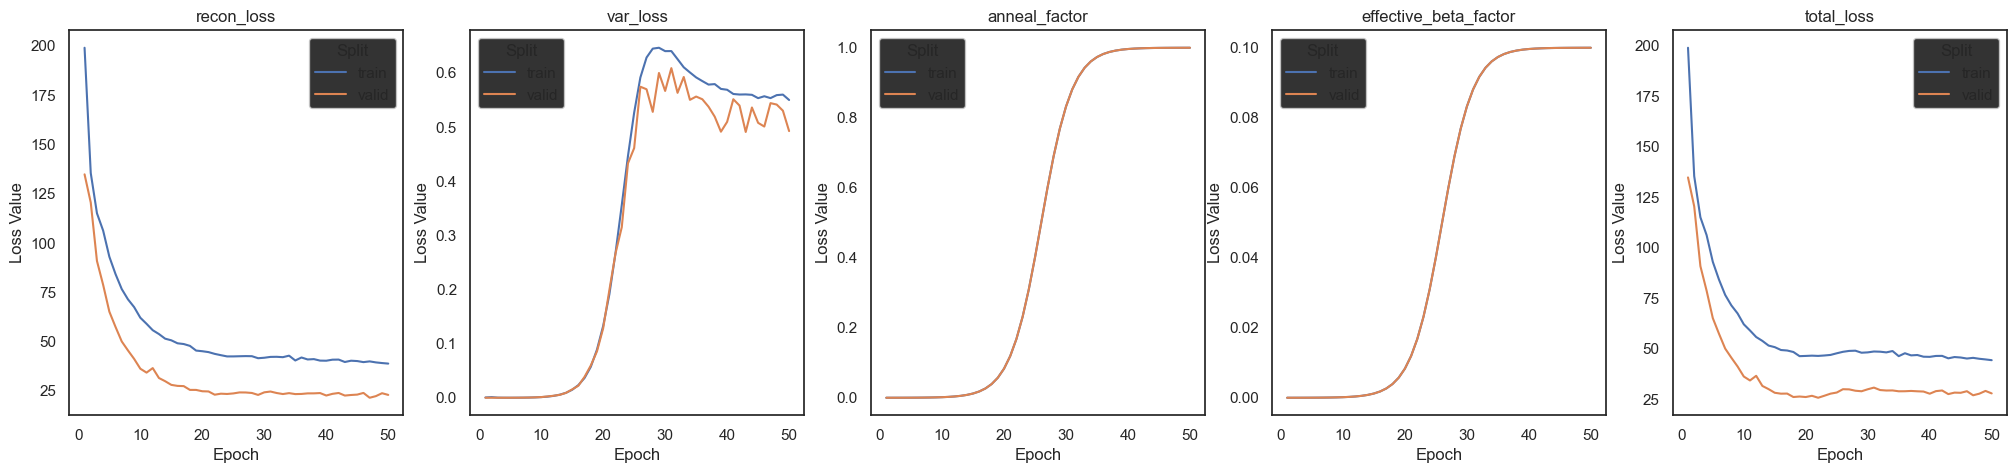

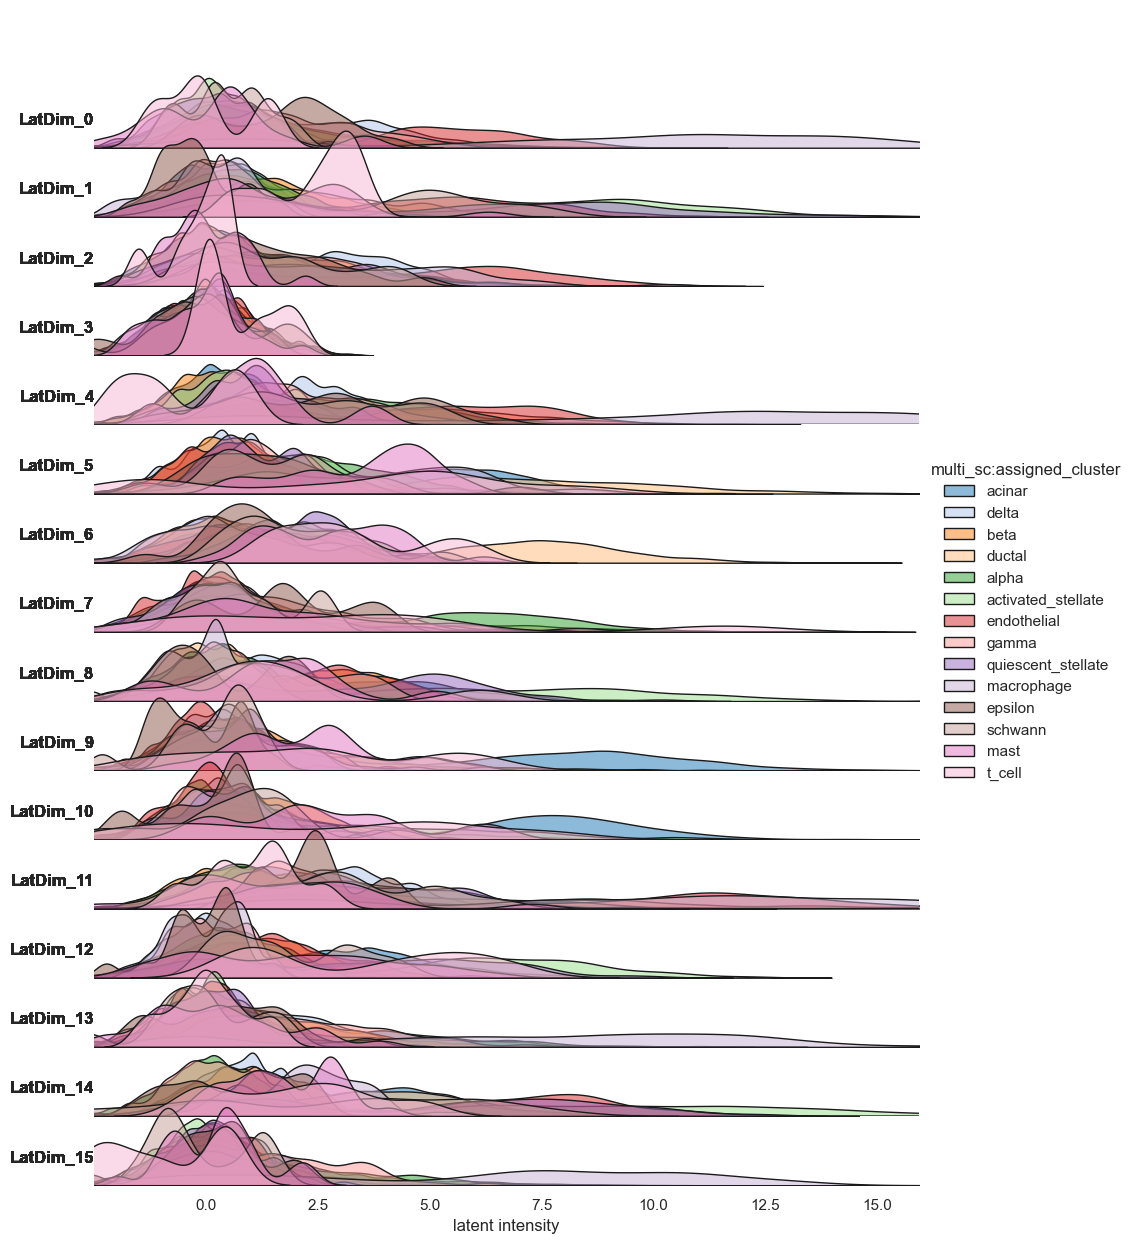

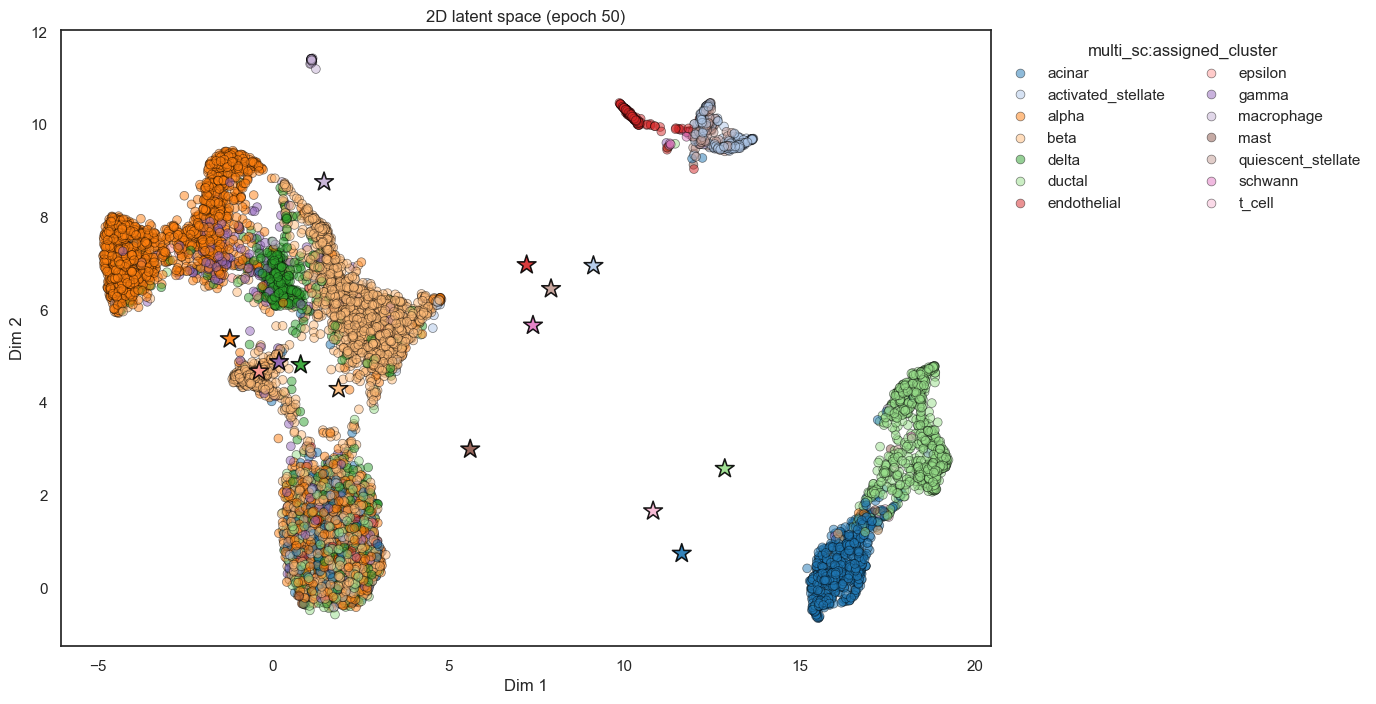

In [60]:
varix_imputed.show_result()

Creating plots ...


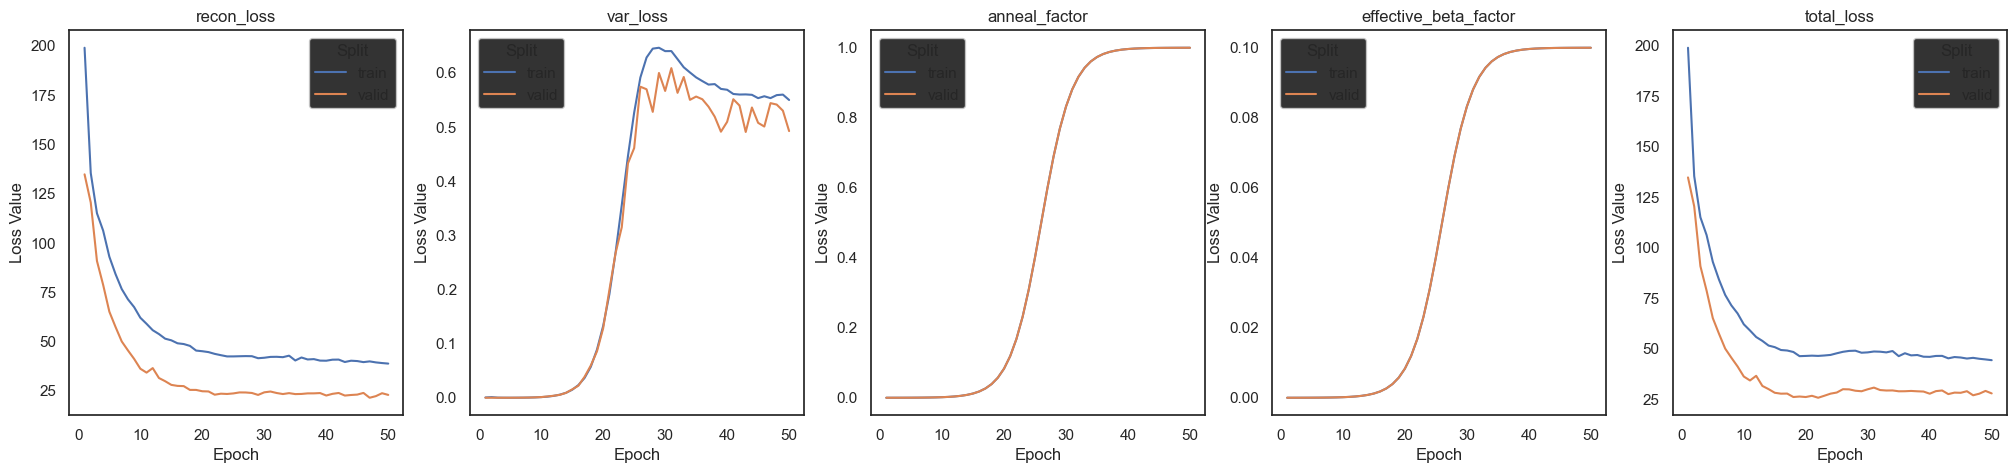

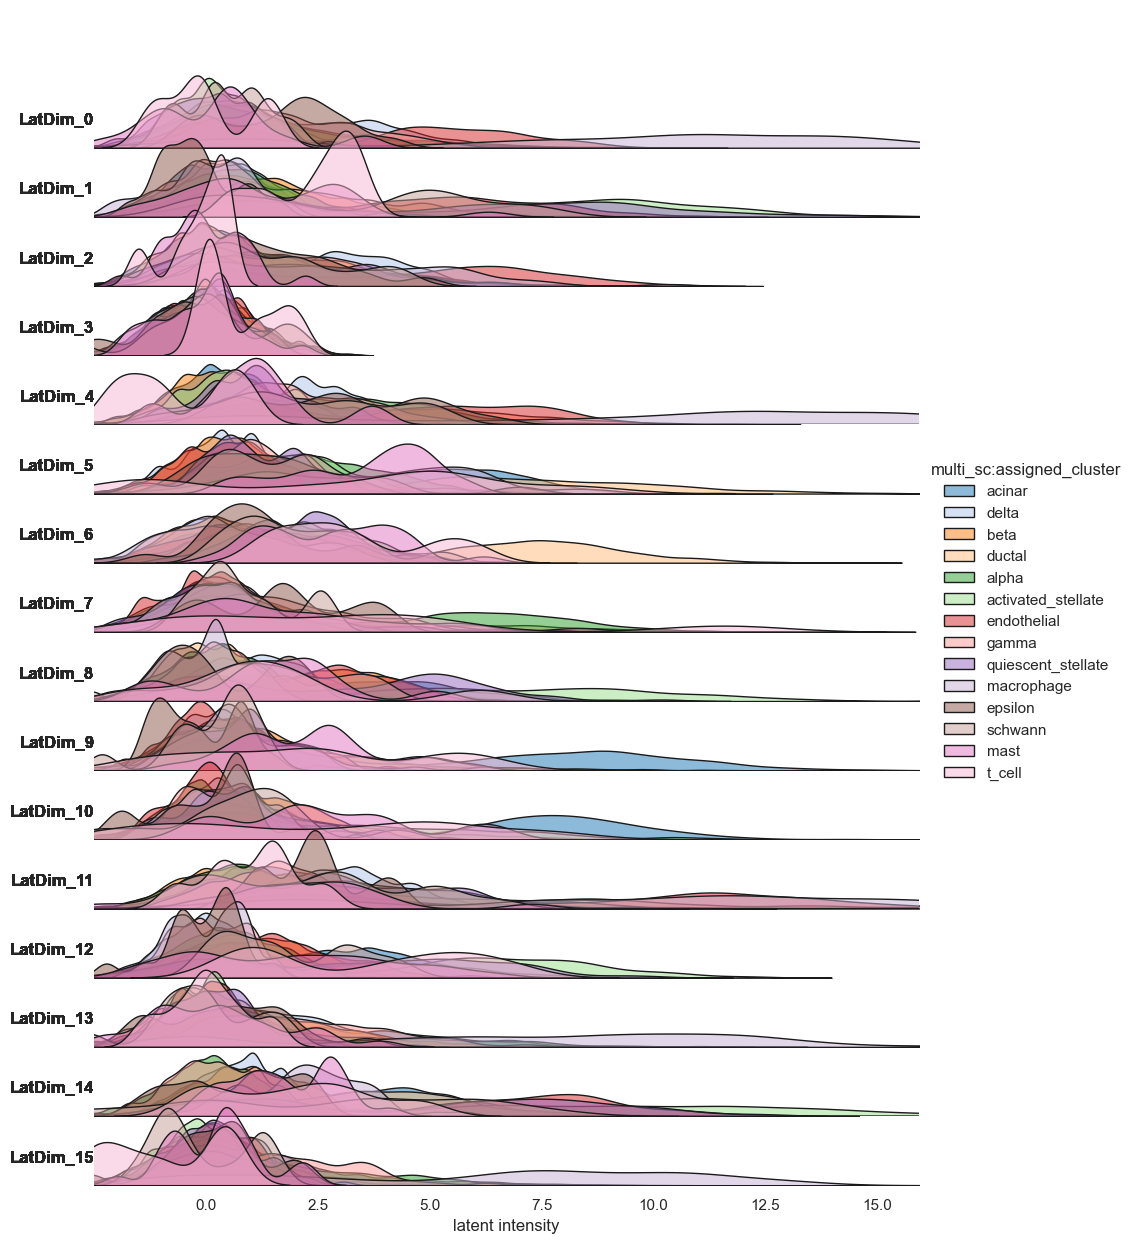

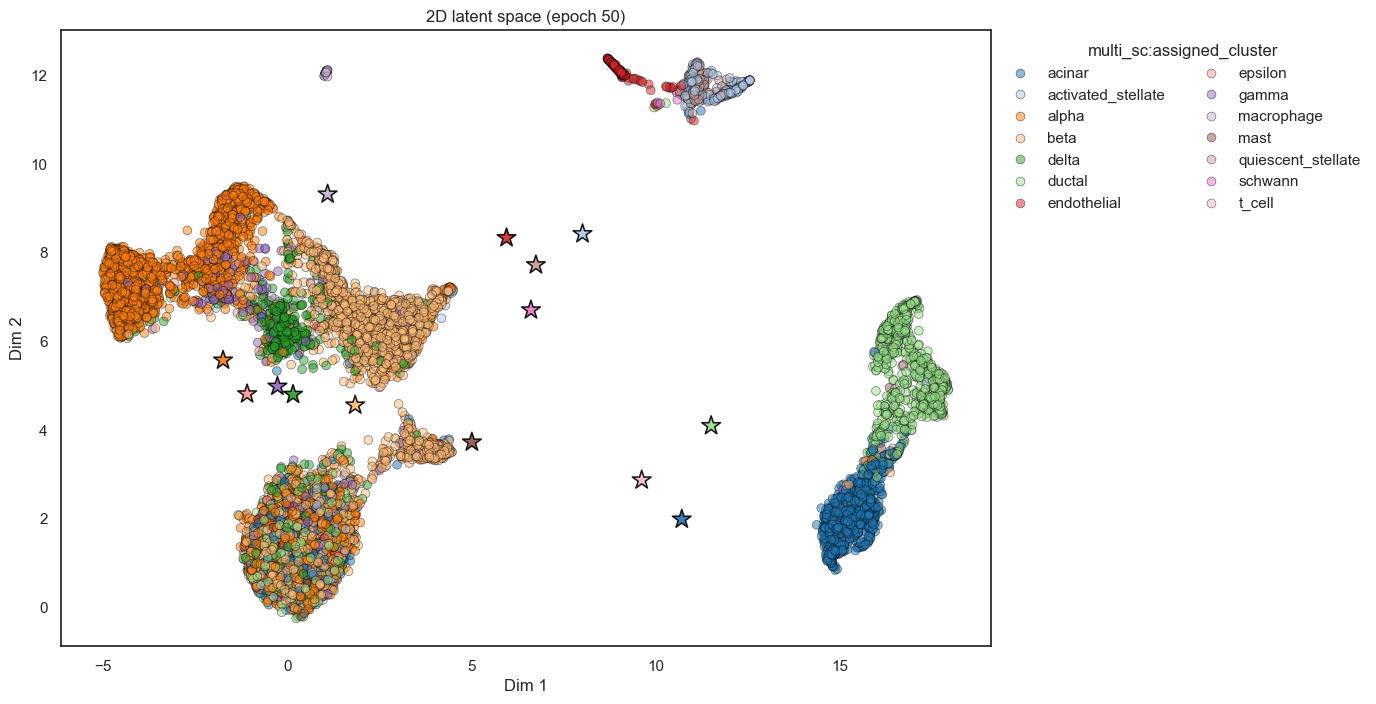

In [61]:
varix_imputed.show_result()

In [62]:
varix_imputed.evaluate()

Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster
Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x477ad3eb0>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x477ad2f20>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x477ad2bf0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 1715 × 16
    uns: 'var_names'
final_reconstruction: N

In [63]:
varix_missing.evaluate()

Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster
Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster
Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: multi_sc:assigned_cluster


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x31ea4b580>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x31ea4bd30>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x31ea4bd90>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 1715 × 16
    uns: 'var_names'
final_reconstruction: N